A2: Unsupervised Analysis Project

# Introduction

The data set given for this assignment is called the Mobile App Survey Data which is about a Research Survey conducted on the download and usage behavior of Mobile apps. It has a total of 87 questions including the sub-parts of some questions. These questions are based on various topics and attempt to gain customers’ information.
In this assignment, we analyzed the mobile app downloading activities of customers and other factors which affect customer behavior. We did this by segmenting the customer base into the following three main segments – 
1)	Demographics of a customer – such as gender, age, marital status, income, education, and occupation which give us some personal information of a customer.

2)	Psychographics of a customer – such as a customer’s social class, lifestyle, and personality traits which help us to get a closer look at a customer’s life, thus, utilizing this information improves the analysis as these factors influence the customer behavior considerably. 

3)	Behavioral data – such as spending and consumptions habits, product/service usage, and desired benefits. This information proves crucial in relevance to analysis since these are some very personal and usually unique factors of each customer which further enhances an analysis. 

According to a recent statistic, there are about 7 billion mobile phone users in the world and this number is at a perpetual rise. (Statista.com, "number-of-global-mobile-users-since-2010", Jul 12, 2021) Let’s say on average a person has about 30-40 apps on his phone, that would make over 200 billion apps. With the increase in technology, we know that the mobile apps industry will continue to evolve and play an important part in everyday human life. 


# Preparing packages and data

So initially in our code, we start by importing all the required libraries, followed by reading and storing the excel file dataset that we have to work on. Then, according to the metrics mentioned in the introduction, we first dropped the data that comes under demographics for the purpose of Principal Component Analysis (PCA). 

In [2]:
import numpy                   as np                   # mathematical essentials
import pandas                  as pd                   # data science essentials
import matplotlib.pyplot       as plt                  # fundamental data visualization
import seaborn                 as sns                  # enhanced visualization
from   sklearn.preprocessing   import StandardScaler # standard scaler
from   sklearn.decomposition   import PCA            # pca
from   scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from   sklearn.cluster         import  KMeans # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
app = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

From the non-demographical data, we decided to separate the data into two other main categories which are Psychometrics and Behavioral data. Next, we made histograms for visualizing the distribution of our dataset. We notice that the distribution of the variables is not as good, so we build logarithms for the variables and later we checked the distribution of logarithm variables with the help of the histogram plots. Our takeaway from this was that the distribution is much better.

In [5]:
non_dem = app.drop(columns = ['caseID','q1', 'q11', 'q48','q49','q50r1','q50r2','q50r3','q50r4','q50r5','q54','q55','q56','q57'])
non_bin = app.loc[:,['q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10',
           'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6',
           'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 
           'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 
           'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 
           'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']]

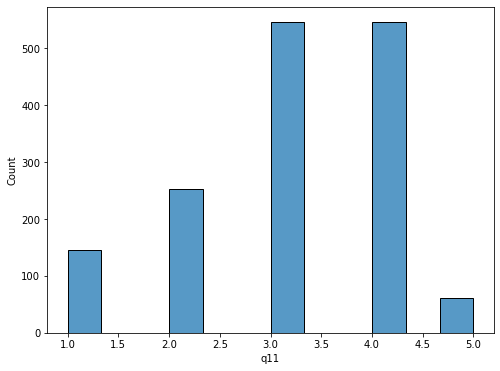

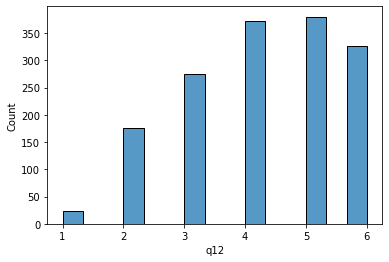

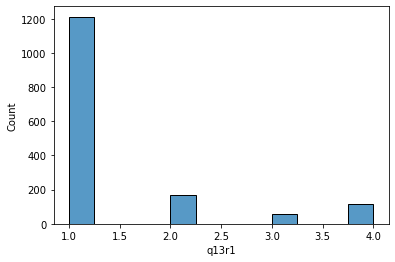

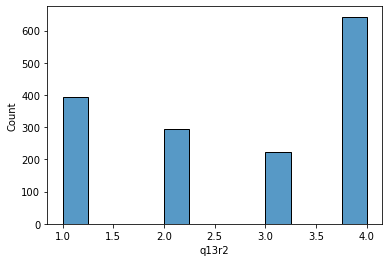

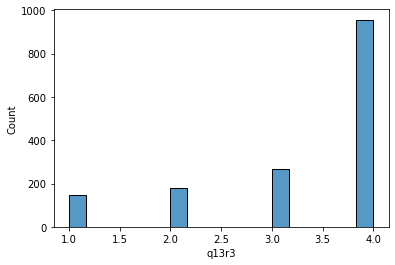

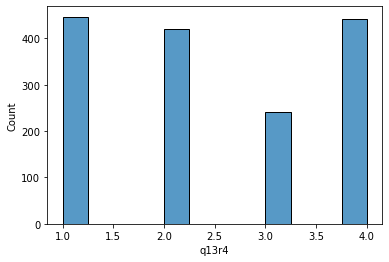

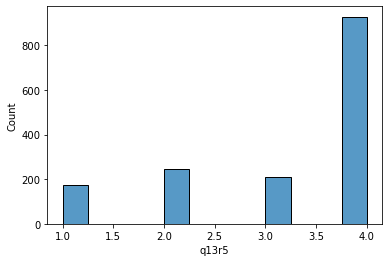

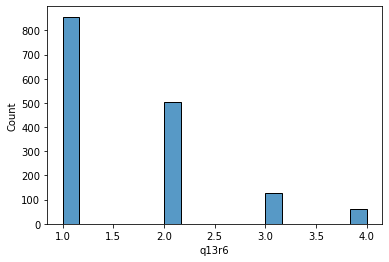

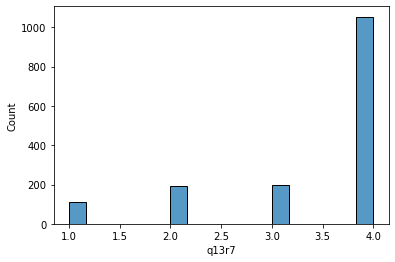

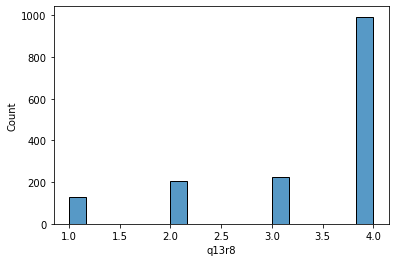

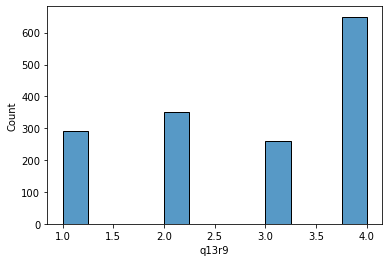

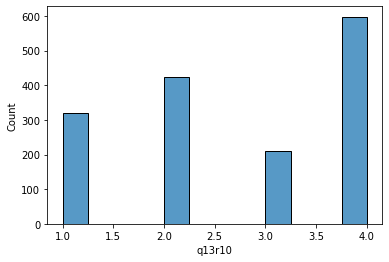

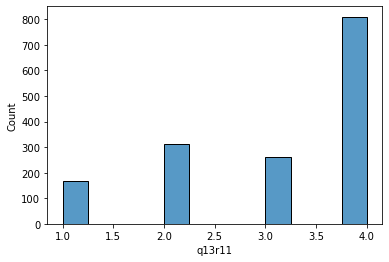

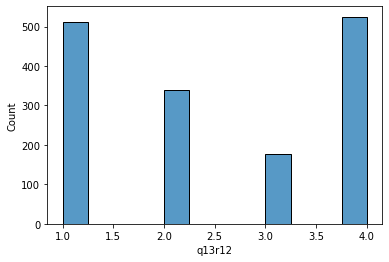

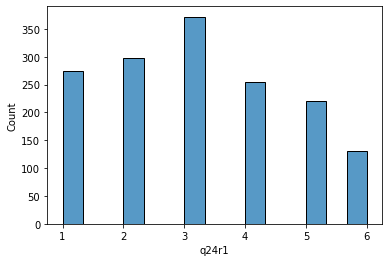

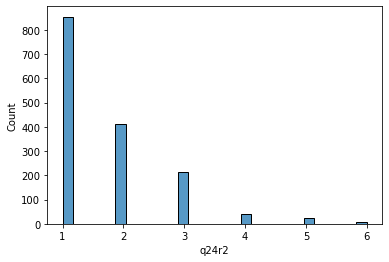

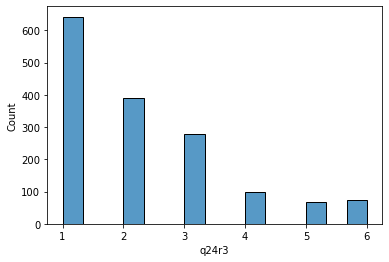

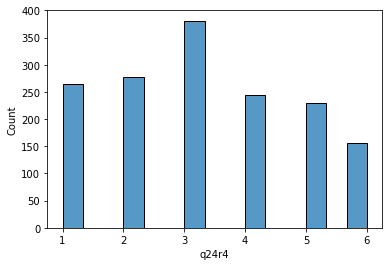

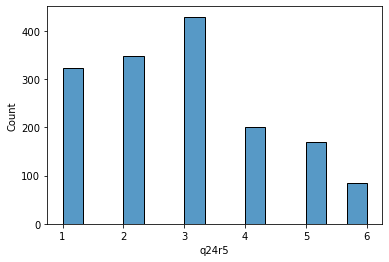

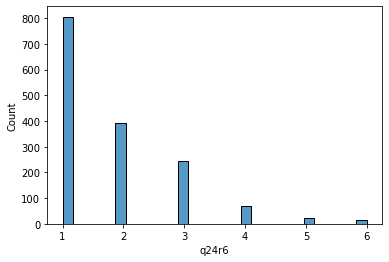

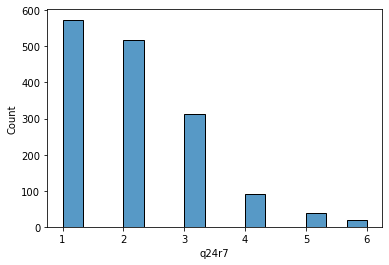

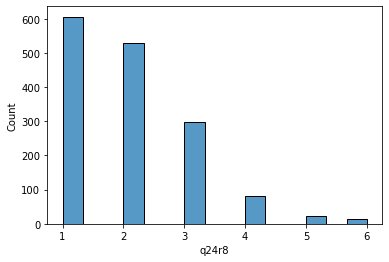

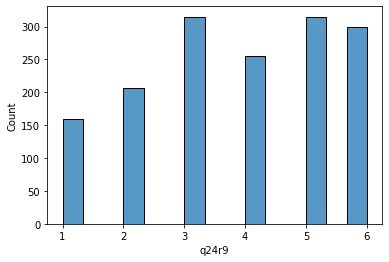

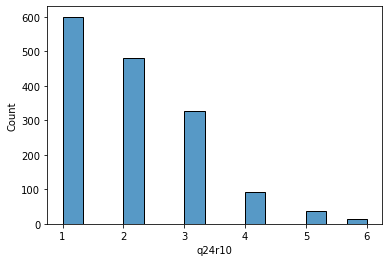

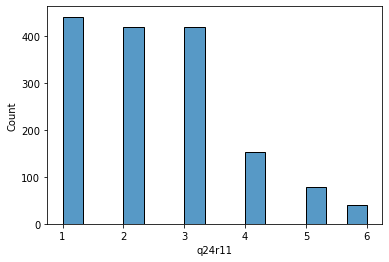

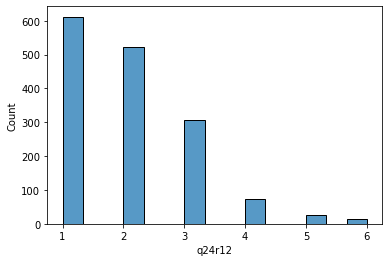

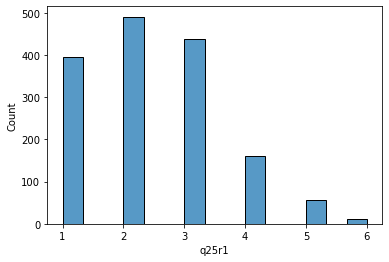

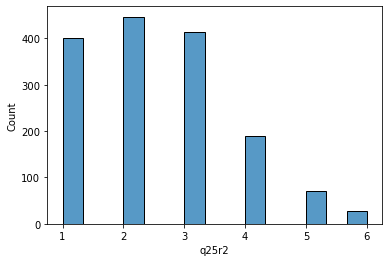

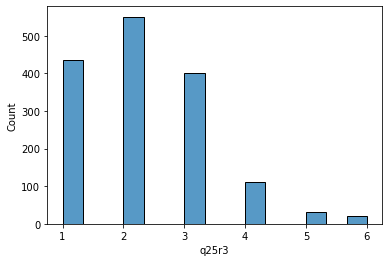

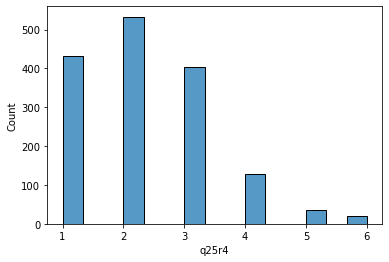

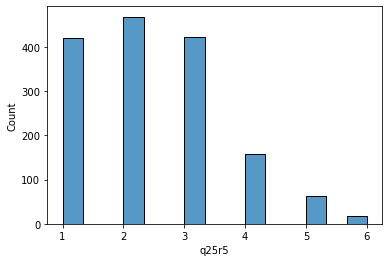

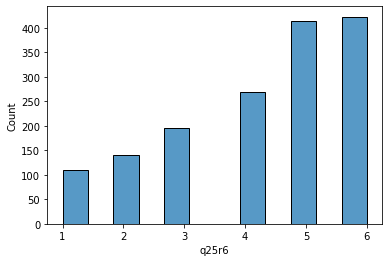

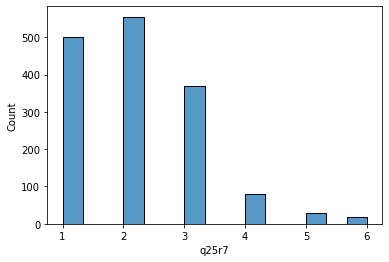

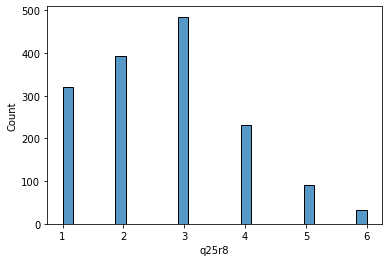

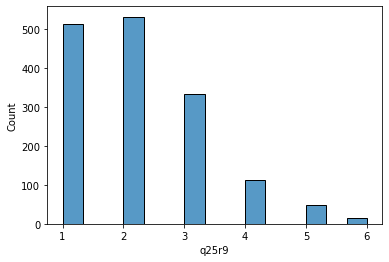

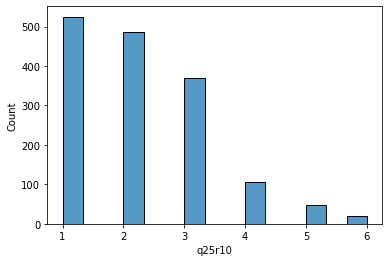

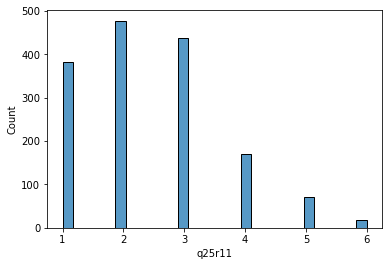

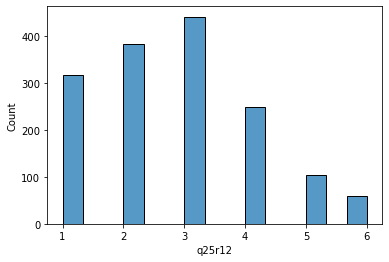

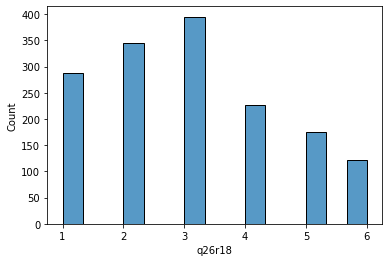

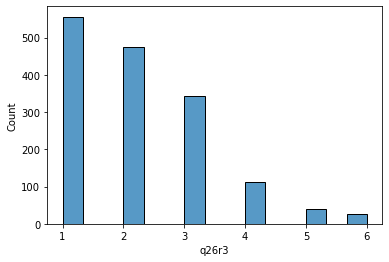

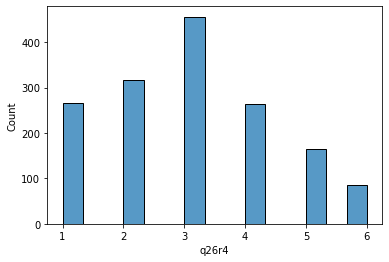

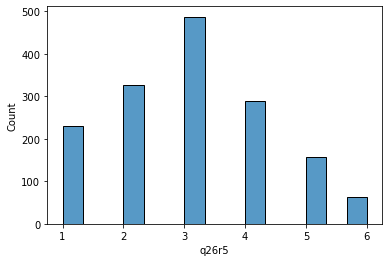

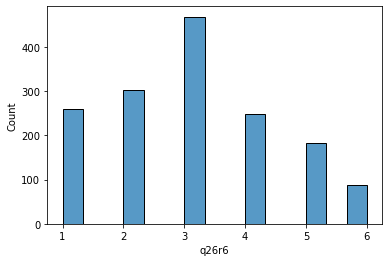

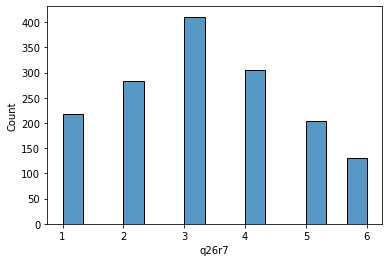

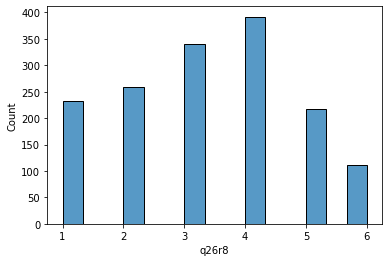

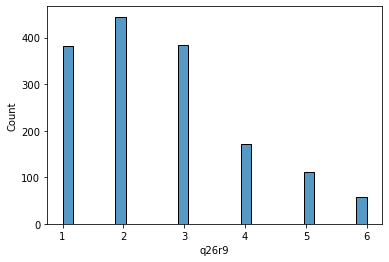

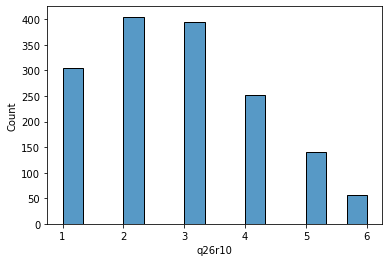

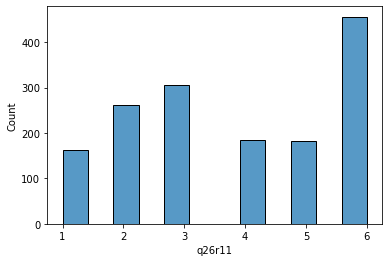

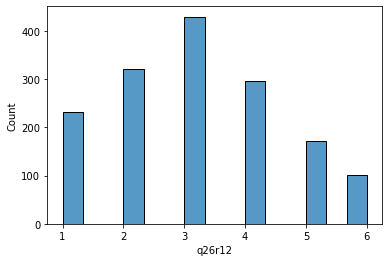

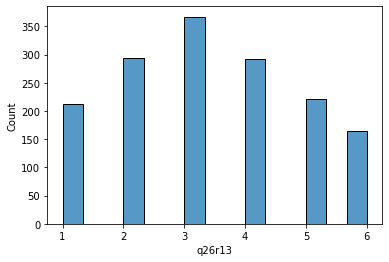

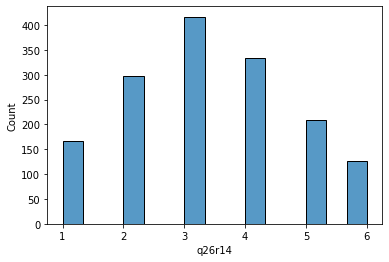

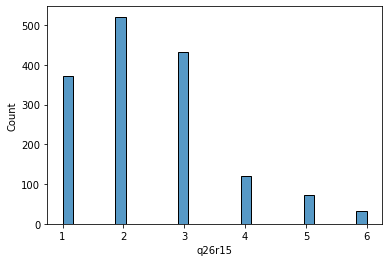

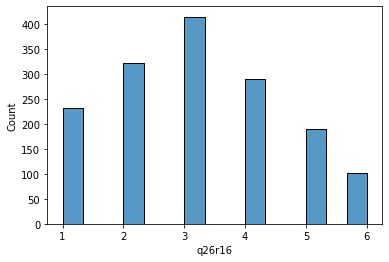

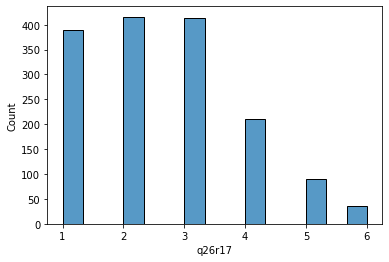

In [6]:
# setting figure size
fig, ax = plt.subplots(figsize = (8,6))


# initializing a counter
count = 0


# looping to create visualizations
for col in non_bin:
    
     # condition to break
    if count == 54:
        break
    
    # increasing count
    count += 1
    
    sns.histplot(x = app[col],)
    plt.show()
    
    

In [7]:
non_bin.skew()

q11      -0.466361
q12      -0.307331
q13r1     2.139607
q13r2    -0.251685
q13r3    -1.204604
q13r4     0.141848
q13r5    -0.983538
q13r6     1.287710
q13r7    -1.392615
q13r8    -1.231766
q13r9    -0.350565
q13r10   -0.155504
q13r11   -0.738382
q13r12    0.101463
q24r1     0.236070
q24r2     1.550639
q24r3     1.178282
q24r4     0.197641
q24r5     0.460256
q24r6     1.402158
q24r7     1.103530
q24r8     1.134564
q24r9    -0.196307
q24r10    1.029884
q24r11    0.761377
q24r12    1.121755
q25r1     0.599123
q25r2     0.644421
q25r3     0.900144
q25r4     0.838731
q25r5     0.678027
q25r6    -0.657664
q25r7     1.010531
q25r8     0.453488
q25r9     0.960337
q25r10    0.941966
q25r11    0.629173
q25r12    0.497082
q26r18    0.398338
q26r3     1.016501
q26r4     0.335952
q26r5     0.288229
q26r6     0.310343
q26r7     0.183920
q26r8     0.036059
q26r9     0.716128
q26r10    0.461990
q26r11   -0.109187
q26r12    0.287497
q26r13    0.156382
q26r14    0.165383
q26r15    0.846748
q26r16    0.

In [8]:
logs = ['q13r1','q13r6','q24r2','q24r3','q24r6','q24r7','q24r8',
       'q24r10','q24r12','q25r7','q26r3']
for col in logs:
    non_dem['log_'+col]=np.log(non_dem[col])

# checking results
non_dem.columns

Index(['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 'log_q13r1', 'log_q13r6', 'log_q24r2', 'log_q24r3', 'log_q24r6', 'log_q24r7', 'log_q24r8', 'log_q24r10', 'log_q24r12', 'log_q25r7', 'log_q26r3'], dtype='object')

The next step of our analysis involved scaling our data so that we could run PCA models. The idea behind developing a PCA model is that it helps to reduce the dimensionality of large datasets and increase the interpretability without losing much information from the dataset. 

In [9]:
logs = ['q13r1','q13r6','q24r2','q24r3','q24r6','q24r7','q24r8',
       'q24r10','q24r12','q25r7','q26r3']

# dropping the non-logarithmic
survey = non_dem.drop(logs, axis = 1)

# list of column names
labels = survey.columns


# transposing the scaled dataframe
survey_rows = pd.DataFrame(np.transpose(survey))

# scaling original data
survey_scaled_transpose = unsupervised_scaler(df = survey_rows)

# transposing to the original 
survey_scaled = pd.DataFrame(np.transpose(survey_scaled_transpose))

# checking pre- and post-scaling variance
# print(np.var(survey), '\n\n')
# print(np.var(survey_scaled))

In [10]:
survey_scaled.columns = ['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1',
                         'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11',
                         'q12', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11',
                         'q13r12', 'q24r1', 'q24r4', 'q24r5', 'q24r9', 'q24r11', 'q25r1', 'q25r2', 'q25r3', 'q25r4',
                         'q25r5', 'q25r6', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r4', 'q26r5',
                         'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15',
                         'q26r16', 'q26r17', 'log_q13r1', 'log_q13r6', 'log_q24r2', 'log_q24r3', 'log_q24r6', 'log_q24r7',
                         'log_q24r8', 'log_q24r10', 'log_q24r12', 'log_q25r7', 'log_q26r3']
survey_scaled

,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q12,q13r2,q13r3,q13r4,q13r5,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r4,q24r5,q24r9,q24r11,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,log_q13r1,log_q13r6,log_q24r2,log_q24r3,log_q24r6,log_q24r7,log_q24r8,log_q24r10,log_q24r12,log_q25r7,log_q26r3
0,-1.279153,-1.279153,-0.770118,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-0.770118,-1.279153,-1.279153,-1.279153,-1.279153,-1.279153,-0.770118,0.756986,0.756986,0.756986,0.756986,0.756986,0.756986,0.756986,0.756986,0.756986,0.756986,1.266021,1.266021,1.266021,0.756986,0.247951,1.266021,1.266021,0.756986,1.266021,0.756986,1.266021,1.266021,0.247951,0.247951,0.756986,1.266021,1.266021,0.247951,0.247951,0.247951,1.266021,1.266021,0.247951,0.756986,1.775056,0.756986,0.756986,0.756986,0.756986,0.756986,0.756986,-1.279153,-0.573481,-0.719921,-0.719921,-0.573481,-0.459893,-0.719921,-0.719921,-0.719921,-0.573481,-0.926317
1,-1.251026,-1.251026,-0.100525,-1.251026,-1.251026,-1.251026,-1.251026,-1.251026,-1.251026,-1.251026,-1.251026,-0.100525,-0.100525,-0.100525,-1.251026,-1.251026,-1.251026,-1.251026,-0.100525,-1.251026,-1.251026,2.200478,1.049977,1.049977,-0.100525,1.049977,1.049977,1.049977,1.049977,1.049977,1.049977,1.049977,-0.100525,-0.100525,-0.100525,-0.100525,1.049977,-0.100525,1.049977,-0.100525,1.049977,1.049977,-0.100525,-0.100525,1.049977,1.049977,1.049977,-0.100525,1.049977,1.049977,1.049977,-0.100525,-0.100525,2.200478,1.049977,1.049977,-0.100525,-0.100525,1.049977,1.049977,1.049977,1.049977,1.049977,-1.251026,-0.453560,-1.251026,-0.453560,-1.251026,-1.251026,-1.251026,-1.251026,-0.453560,-0.453560,-0.453560
2,-1.227974,-1.227974,-1.227974,-1.227974,-0.721018,-1.227974,-1.227974,-1.227974,-1.227974,-1.227974,-1.227974,-1.227974,-1.227974,-1.227974,-0.721018,-0.721018,-1.227974,-1.227974,-1.227974,-1.227974,-1.227974,1.306805,0.292894,0.799850,-0.214062,0.799850,0.799850,0.799850,-0.214062,0.799850,0.799850,0.292894,1.306805,0.292894,0.292894,0.292894,1.306805,0.292894,1.306805,0.799850,-0.214062,1.306805,1.306805,0.799850,0.799850,0.292894,0.292894,0.799850,1.813761,0.799850,0.292894,1.306805,1.813761,1.306805,1.306805,1.306805,0.292894,1.306805,1.306805,0.799850,1.306805,0.292894,0.292894,-1.227974,-0.876579,-0.671026,-0.876579,-0.671026,-0.876579,-0.671026,-0.525184,-0.671026,-0.525184,-1.227974
3,-0.391180,-0.391180,-1.130047,-1.130047,-1.130047,-1.130047,-1.130047,-1.130047,-1.130047,-1.130047,-1.130047,-1.130047,-0.391180,-0.391180,-1.130047,-0.391180,-1.130047,-1.130047,-1.130047,-1.130047,-1.130047,0.347686,1.825419,1.825419,1.825419,1.825419,1.825419,1.825419,0.347686,1.825419,1.825419,1.825419,0.347686,0.347686,-0.391180,0.347686,0.347686,0.347686,0.347686,0.347686,0.347686,-0.391180,0.347686,1.086553,0.347686,0.347686,0.347686,-0.391180,1.086553,-0.391180,0.347686,0.347686,1.825419,1.086553,0.347686,0.347686,0.347686,1.086553,0.347686,1.086553,0.347686,0.347686,0.347686,-1.130047,-0.617904,-1.130047,-1.130047,-1.130047,-1.130047,-0.617904,-0.617904,-0.318319,-1.130047,-1.130047
4,-0.444533,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-0.444533,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,-1.259497,1.185396,0.370431,1.185396,1.185396,1.185396,0.370431,0.370431,2.000360,-0.444533,0.370431,0.370431,1.185396,0.370431,0.370431,1.185396,0.370431,1.185396,0.370431,1.185396,1.185396,1.185396,1.185396,0.370431,0.370431,0.370431,-0.444533,-0.444533,0.370431,-0.444533,2.000360,1.185396,1.185396,1.185396,0.370431,1.185396,1.185396,1.185396,1.185396,1.185396,0.370431,1.185396,-0.444533,-1.259497,-0.694607,-0.364167,-0.364167,-0.364167,-0.364167,-0.694607,-0.364167,-0.694607,-0.364

In [11]:
psychometrics_data = survey_scaled.loc[: , ['q24r1', 'q24r4', 'q24r5', 'q24r9', 'q24r11', 'q25r1', 'q25r2', 'q25r3',
                                       'q25r4', 'q25r5', 'q25r6', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12',
                                       'q26r18', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 
                                       'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17',
                                       'log_q24r2', 'log_q24r3', 'log_q24r6', 'log_q24r7', 'log_q24r8',
                                       'log_q24r10', 'log_q24r12', 'log_q25r7', 'log_q26r3']]

In [12]:
behavioral_data = survey_scaled.loc[: , ['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10',
                                         'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10',
                                         'q4r11', 'q12', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r7', 'q13r8',
                                         'q13r9', 'q13r10', 'q13r11', 'q13r12',  'log_q13r1', 'log_q13r6']]

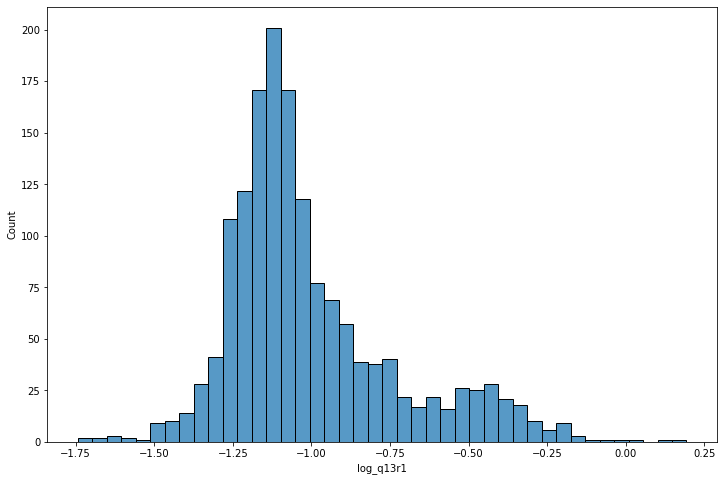

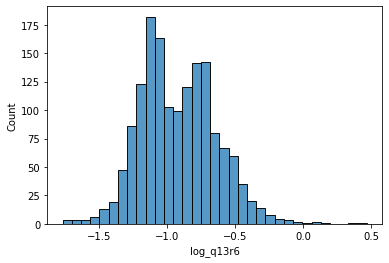

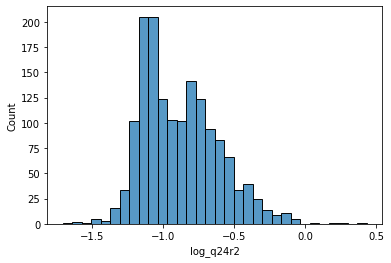

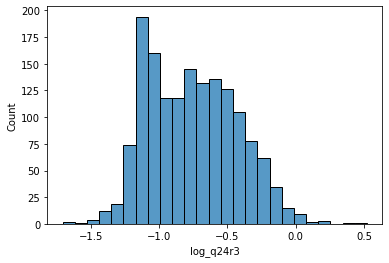

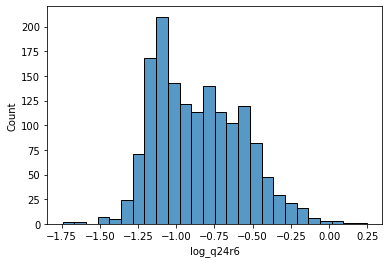

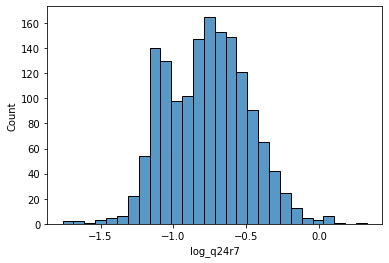

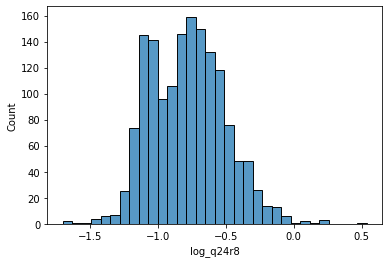

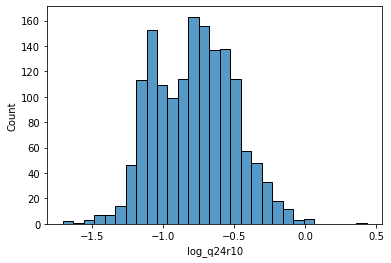

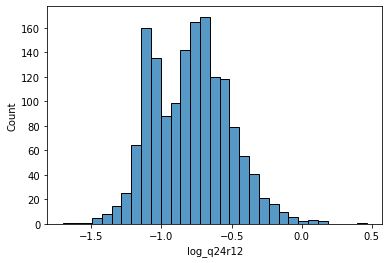

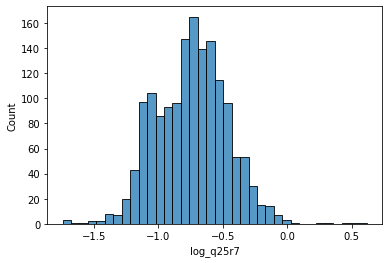

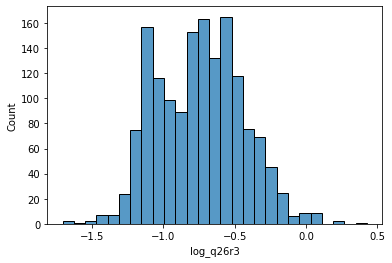

In [13]:
hist_log = ['log_q13r1','log_q13r6','log_q24r2','log_q24r3','log_q24r6','log_q24r7','log_q24r8',
       'log_q24r10','log_q24r12','log_q25r7','log_q26r3']

# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))


# initializing a counter
count = 0


# looping to create visualizations
for col in hist_log:

    # condition to break
    if count == 15:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    sns.histplot(x = survey_scaled[col],)
    
    plt.show()

# PCA

We did this using the Scree Plots and by looking at the elbow formation, we decided to put the line after the scree curve and chose 5 as our number of components for analysis. Then we renamed the columns of the psychometrics and behavioral datasets by looking at about 5 values for each top 5% and bottom 5%. After that, came our concatenation of the PCA and then scaling it once again. 

In [14]:
# INSTANTIATING a PCA object with no limit to principal components
pca_psychometrics = PCA(n_components = 6,
                     random_state = 219)


# FITTING and TRANSFORMING the scaled data
app_pca = pca_psychometrics.fit_transform(psychometrics_data)


# comparing dimensions of each DataFrame
print("Original shape:", psychometrics_data.shape)
print("PCA shape     :", app_pca.shape)

Original shape: (1552, 40)
PCA shape     : (1552, 6)


In [15]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca_psychometrics.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.127
PC 2: 0.081
PC 3: 0.059
PC 4: 0.051
PC 5: 0.045
PC 6: 0.04


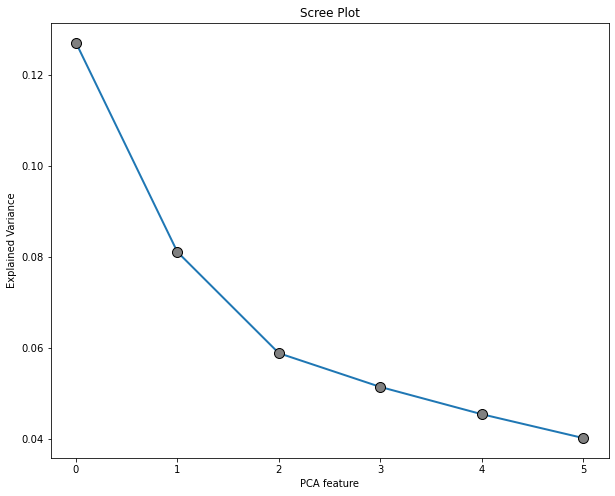

In [16]:
scree_plot(pca_object = pca_psychometrics,
          export = False)

In [17]:
# transposing pca components
factor_loadings_psychometrics_df = pd.DataFrame(np.transpose(pca_psychometrics.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_psychometrics_df = factor_loadings_psychometrics_df.set_index(psychometrics_data.columns)


# checking the result
print(factor_loadings_psychometrics_df)


# saving to Excel
factor_loadings_psychometrics_df.to_excel('psychometrics_pca_1.xlsx')

               0     1     2     3     4     5
q24r1       0.19  0.02 -0.21  0.21 -0.57  0.44
q24r4       0.40  0.16 -0.34 -0.11 -0.13 -0.42
q24r5      -0.05 -0.06  0.00  0.35 -0.20 -0.06
q24r9       0.49  0.14 -0.27 -0.19 -0.09 -0.26
q24r11     -0.16  0.19  0.05  0.16 -0.10 -0.08
q25r1      -0.14  0.19 -0.03 -0.14 -0.07 -0.01
q25r2      -0.15  0.17 -0.07 -0.12  0.02  0.07
q25r3      -0.13  0.18 -0.09 -0.06 -0.06  0.02
q25r4      -0.15  0.23 -0.02 -0.16 -0.00  0.00
q25r5      -0.17  0.15 -0.03 -0.00 -0.03  0.01
q25r6       0.33 -0.23  0.01  0.07  0.20  0.32
q25r8      -0.12  0.18 -0.03 -0.13  0.10  0.10
q25r9      -0.13  0.20 -0.04 -0.08 -0.01  0.02
q25r10     -0.13  0.19  0.06 -0.11 -0.06 -0.06
q25r11     -0.11  0.22  0.01 -0.25 -0.05  0.03
q25r12      0.07  0.10  0.00 -0.22  0.17  0.27
q26r18     -0.16 -0.21 -0.34 -0.27 -0.06  0.12
q26r4      -0.11 -0.21 -0.23 -0.09 -0.03  0.07
q26r5      -0.03 -0.17 -0.06  0.02 -0.20 -0.05
q26r6      -0.13 -0.14  0.00  0.00 -0.09  0.10
q26r7      -0

In [18]:
# INSTANTIATING a PCA object with no limit to principal components
pca_behavioral = PCA(n_components = 6,
                     random_state = 219)


# FITTING and TRANSFORMING the scaled data
app_pca = pca_behavioral.fit_transform(behavioral_data)


# comparing dimensions of each DataFrame
print("Original shape:", behavioral_data.shape)
print("PCA shape     :", app_pca.shape)

Original shape: (1552, 34)
PCA shape     : (1552, 6)


In [19]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca_behavioral.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.168
PC 2: 0.136
PC 3: 0.088
PC 4: 0.076
PC 5: 0.063
PC 6: 0.055


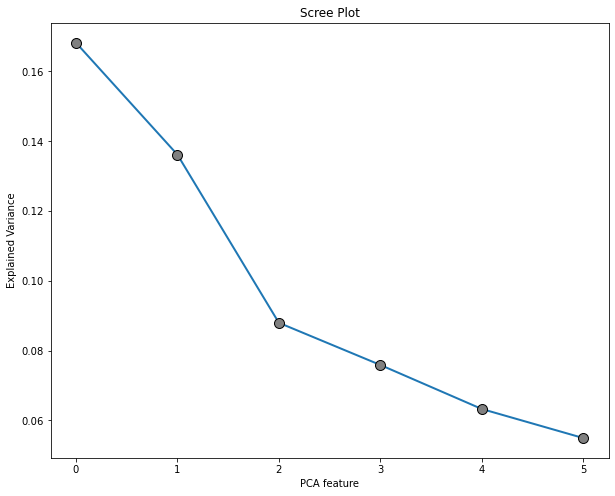

In [20]:
scree_plot(pca_object = pca_behavioral,
          export = False)

In [21]:
# transposing pca components
factor_loadings_behavioral_df = pd.DataFrame(np.transpose(pca_behavioral.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_behavioral_df = factor_loadings_behavioral_df.set_index(behavioral_data.columns)


# checking the result
print(factor_loadings_behavioral_df)


# saving to Excel
factor_loadings_behavioral_df.to_excel('behavioral_pca_2.xlsx')

              0     1     2     3     4     5
q2r1       0.03  0.08 -0.11  0.20 -0.03  0.07
q2r2       0.02  0.10 -0.07  0.17  0.08  0.04
q2r3       0.04  0.13 -0.03  0.04  0.07  0.04
q2r4      -0.00  0.09  0.02  0.13  0.06  0.05
q2r5       0.02  0.07 -0.01  0.09  0.03  0.02
q2r6       0.02  0.07 -0.01  0.11  0.06  0.02
q2r7       0.02  0.06 -0.03  0.08  0.02  0.03
q2r8      -0.00  0.09 -0.07  0.15  0.03  0.02
q2r9       0.03  0.03 -0.03  0.06  0.02  0.01
q2r10      0.04  0.03 -0.04  0.06  0.01  0.02
q4r1       0.02  0.16 -0.13  0.15  0.01  0.12
q4r2      -0.01  0.17 -0.05  0.19  0.06  0.06
q4r3       0.01  0.19 -0.09  0.21  0.08  0.07
q4r4      -0.01  0.18 -0.04  0.20  0.09  0.07
q4r5       0.05  0.15 -0.09  0.16  0.07  0.02
q4r6       0.05  0.16 -0.10  0.16  0.03  0.03
q4r7       0.01  0.16 -0.07  0.20  0.10  0.06
q4r8       0.02  0.18 -0.09  0.20  0.04  0.05
q4r9      -0.01  0.16 -0.09  0.18  0.01  0.06
q4r10      0.03  0.03 -0.03  0.06  0.00  0.02
q4r11      0.04  0.02 -0.03  0.05 

In [22]:
# labeling the components columns for psychometric data
factor_loadings_psychometrics_df.columns = ['Trendy and Overwhelmed', 'Active decision maker', 'Informed parents',
                                            'Technology controlled', 'Retired people', 'Business Professional']

In [23]:
# labeling the components columns for behavioral data
factor_loadings_behavioral_df.columns = ['Movies lover', 'Free Apps Lovers', 'Netflix Addicted',
                                         'Wealthy People', 'Sociable and Networkers', 'Movie and Music fans']

In [24]:
# analyzing factor strengths per customer
factor_loadings_psychometrics_df = pca_psychometrics.transform(psychometrics_data)

# converting to a DataFrame
factor_loadings_psychometrics_df = pd.DataFrame(factor_loadings_psychometrics_df)

# renaming columns
factor_loadings_psychometrics_df.columns = ['Trendy and Overwhelmed', 'Active decision maker', 'Informed parents',
                                            'Technology controlled', 'Retired people', 'Business Professional']


# checking the results
factor_loadings_psychometrics_df

,Trendy and Overwhelmed,Active decision maker,Informed parents,Technology controlled,Retired people,Business Professional
0,-0.822649,0.855863,-0.183252,-0.855476,-0.724640,0.283378
1,-2.773268,0.670244,-0.187684,0.641142,0.774609,-0.884260
2,-2.175508,0.072386,-1.188465,0.175168,-0.078986,0.415097
3,-1.197788,0.494350,-0.049663,0.085228,0.375000,-0.049463
4,-0.935322,0.058986,0.123372,0.305584,-0.646369,-0.343525
...,...,...,...,...,...,...
1547,1.538006,0.122782,2.171843,-0.459830,1.034462,0.145278
1548,2.405440,2.120046,-0.429862,0.427164,-0.870462,0.996473
1549,-1.254639,-0.135457,0.385167,-0.986420,0.391035,-0.476009
1550,1.484584,0.526042,-0.419634,-0.285709,0.880580,0.859221


In [25]:
# analyzing factor strengths per customer
factor_loadings_behavioral_df = pca_behavioral.transform(behavioral_data)

# converting to a DataFrame
factor_loadings_behavioral_df = pd.DataFrame(factor_loadings_behavioral_df)

# renaming columns
factor_loadings_behavioral_df.columns = ['Movies lover', 'Free Apps Lovers', 'Netflix Addicted',
                                         'Wealthy People', 'Sociable and Networkers', 'Movie and Music fans']


# checking the results
factor_loadings_behavioral_df

,Movies lover,Free Apps Lovers,Netflix Addicted,Wealthy People,Sociable and Networkers,Movie and Music fans
0,-0.383527,-2.717251,0.310879,0.119128,0.051935,0.064016
1,0.751948,0.427306,0.263776,-0.640187,-0.185164,0.724495
2,-0.660822,-0.678892,0.494146,-0.702816,0.316097,0.171434
3,2.828095,-1.700383,0.463873,0.846751,0.821891,0.246968
4,-0.415539,-1.035163,-0.093577,-0.490355,-1.519514,-0.974765
...,...,...,...,...,...,...
1547,0.319766,0.850264,-0.558730,1.029094,1.161785,0.319244
1548,0.966336,-0.516649,-1.287725,0.646257,-0.054650,-0.777625
1549,-1.581301,2.147174,-0.187844,-0.134085,0.510562,0.286088
1550,0.533436,0.370756,-1.844651,-0.738904,0.584770,0.407158


# Clustering

Then came our hierarchical clustering where we first built a dendrogram. A dendrogram is part of the hierarchical clustering and shows the hierarchical relationship between the objects of the dataset. Next up in our analysis was the K-means clustering algorithm. K-means algorithm is one of the most popular and simple clustering algorithms in unsupervised machine learning techniques. 

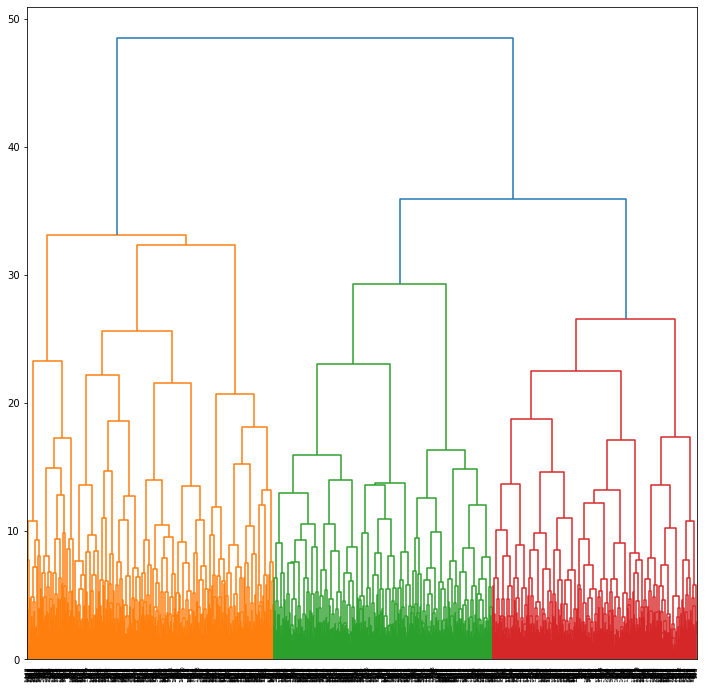

In [26]:
# concatenating the dataframes
factors_joined = pd.concat([factor_loadings_psychometrics_df,
                          factor_loadings_behavioral_df],
                          axis = 1)

# applying the unsupervised_scaler function
pca = unsupervised_scaler(factors_joined)


# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [27]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 6,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

4    355
3    298
5    283
1    222
0    215
2    179
Name: Cluster, dtype: int64


## Naming Columns for components

To appropriately name the components, after the questions were separated into Psychometric and categorical, it was necessary to analyze the results of the PCA. To do this, first each analysis was opened in an individual Microsoft excel file. Each row in excel represented a different question of the survey, the rows were identified based on their corresponding question and answer. 

In each component there were certain correlations with each question, in order to do a proper analysis, only the strongest correlations were taken into account. Each team member observed each column or component and reviewed what the positive and negative correlations could mean, and how that would fit in a group together. 
For example, in the case of the categorical questions, some people had specific ideas and opinions towards technology, apps, entertainment and personal preferences. As some variance was explained by this correlation, the team put each component into a “box” in order to understand this group of people and cater to their needs from a marketing and sales perspective. 




In [28]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Trendy and Overwhelmed', 'Active decision maker', 'Informed parents',
                            'Technology controlled', 'Retired people', 'Business Professional',
                            'Movies lover', 'Free Apps Lovers', 'Netflix Addicted',
                            'Wealthy People', 'Sociable and Networkers', 'Movie and Music fans']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Trendy and Overwhelmed,Active decision maker,Informed parents,Technology controlled,Retired people,Business Professional,Movies lover,Free Apps Lovers,Netflix Addicted,Wealthy People,Sociable and Networkers,Movie and Music fans
0,0.93,-0.18,0.94,-0.34,-0.42,-0.05,0.26,0.24,-0.35,0.69,-0.73,-0.11
1,0.00,0.65,0.59,0.83,0.66,0.23,1.33,0.68,0.13,-0.18,0.42,0.05
2,1.09,0.20,-0.55,-0.04,0.85,-0.17,-0.31,0.53,-0.13,0.96,0.77,0.40
3,-0.11,-0.46,-0.42,-0.77,-0.03,0.24,-0.50,-0.10,-0.74,-0.28,-0.04,-0.50
4,-0.83,0.54,-0.16,-0.20,-0.33,-0.36,-0.50,-0.27,0.82,-0.41,-0.01,-0.22
5,-0.24,-0.69,-0.18,0.69,-0.28,0.17,0.12,-0.61,-0.01,-0.18,-0.21,0.59


In [29]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         factors_joined],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([app.loc[ : , ['caseID','q1', 'q11',
                                                       'q48','q49','q50r1',
                                                       'q50r2','q50r3','q50r4',
                                                       'q50r5','q54','q55','q56','q57']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = ['caseID','q1', 'q11','q48',
                              'q49','q50r1','q50r2','q50r3',
                              'q50r4','q50r5','q54','q55','q56','q57',
                              'Cluster','Trendy and Overwhelmed', 'Active decision maker', 'Informed parents',
                              'Technology controlled', 'Retired people', 'Business Professional',
                              'Movies lover', 'Free Apps Lovers', 'Netflix Addicted',
                              'Wealthy People', 'Sociable and Networkers', 'Movie and Music fans']


# checking the results
final_pca_clust_df.head(n = 5)

,caseID,q1,q11,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57,Cluster,Trendy and Overwhelmed,Active decision maker,Informed parents,Technology controlled,Retired people,Business Professional,Movies lover,Free Apps Lovers,Netflix Addicted,Wealthy People,Sociable and Networkers,Movie and Music fans
0,1,10,1,3,4,1,0,0,0,0,2,2,5,1,4,-0.82,0.86,-0.18,-0.86,-0.72,0.28,-0.38,-2.72,0.31,0.12,0.05,0.06
1,2,5,3,5,1,0,1,1,0,0,3,2,10,2,4,-2.77,0.67,-0.19,0.64,0.77,-0.88,0.75,0.43,0.26,-0.64,-0.19,0.72
2,3,7,1,4,4,0,0,0,1,0,2,2,6,1,4,-2.18,0.07,-1.19,0.18,-0.08,0.42,-0.66,-0.68,0.49,-0.70,0.32,0.17
3,4,7,2,2,1,0,1,1,0,0,1,2,5,1,1,-1.20,0.49,-0.05,0.09,0.37,-0.05,2.83,-1.70,0.46,0.85,0.82,0.25
4,6,2,2,5,2,1,0,0,0,0,3,2,4,2,4,-0.94,0.06,0.12,0.31,-0.65,-0.34,-0.42,-1.04,-0.09,-0.49,-1.52,-0.97


In [30]:
# renaming q1
age = {1 : 'Under 18 years',
       2 : '18-24 years',
       3 : '25-29 years',
       4 : '30-34 years',
       5 : '35-39 years',
       6 : '40-44 years',
       7 : '45-49 years',
       8 : '50-54 years',
       9 : '55-59 years',
       10 : '60-64 years',
       11 : '65-over years'}


final_pca_clust_df['q1'].replace(age, inplace = True)



# renaming q11
apps = {1 : '1-5 apps',
        2 : '6-10 apps',
        3 : '11-30 apps',
        4 : '31+ apps',
        5 : "Don't know",
        6 : 'No apps'}


final_pca_clust_df['q11'].replace(apps, inplace = True)

# renaming q48
educ = {1 : 'Some High school',
        2 : 'High school graduate',
        3 : 'Some College',
        4 : 'College graduate',
        5 : "Some postgraduate studies",
        6 : 'Postgraduate degree'}


final_pca_clust_df['q48'].replace(educ, inplace = True)

# renaming q49
marriage = {1 : 'Married',
            2 : 'Single',
            3 : 'Single with a partner',
            4 : 'Separated/Widowed/Divorced'}


final_pca_clust_df['q49'].replace(marriage, inplace = True)

# renaming q50r1
child =     {0 : 'Has children',
             1 : 'No children'}


final_pca_clust_df['q50r1'].replace(child, inplace = True)
             
# renaming q50r2
child_age = {0 : 'Not preschool children',
             1 : 'Preschool children'}


final_pca_clust_df['q50r2'].replace(child_age, inplace = True)
       
# renaming q50r3
children  = {0 : 'Children not 6-12 years old',
             1 : 'Children 6-12 years old'}


final_pca_clust_df['q50r3'].replace(children, inplace = True)
             
# renaming q50r4
children_teenager  = {0 : 'Not teenager children',
                      1 : 'Teenager children'}


final_pca_clust_df['q50r4'].replace(children_teenager, inplace = True)
             
# renaming q50r5
children_adult  = {0 : 'Children under 18 years old',
                   1 : 'Children 18 years old or older'}


final_pca_clust_df['q50r5'].replace(children_adult, inplace = True)
             
# renaming q54
race = {1 : 'White/Caucasian',
        2 : 'Black/African American',
        3 : 'Asian',
        4 : 'Native Hawaiian or Other Pacific Islander',
        5 : "American Indian or Alaska Native",
        6 : 'Other race'}


final_pca_clust_df['q54'].replace(race, inplace = True)
             
# renaming q55
hispanic = {1 : 'Hispanic or latino',
            2 : 'Not Hispanic or Latino'}


final_pca_clust_df['q55'].replace(hispanic, inplace = True)
             
# renaming q56
income =   {1 : 'Under $10,000',
            2 : '$10,000-$14,999',
            3 : '$15,000-$19,999',
            4 : '$20,000-$29,999',
            5 : '$30,000-$39,999',
            6 : '$40,000-$49,999',
            7 : '$50,000-$59,999',
            8 : '$60,000-69,999',
            9 : '$70,000-79,999',
            10 : '$80,000-$89,999',
            11 : '$90,000-99,999',
            12 : '$100,000-$124,999',
            13 : '$125,000-$149,999',
            14 : '$150,000 and over'}


final_pca_clust_df['q56'].replace(income, inplace = True)
             
# renaming q57
gender =   {1 : 'Male',
            2 : 'Female'}


final_pca_clust_df['q57'].replace(gender, inplace = True)

# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,caseID,q1,q11,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57,Cluster,Trendy and Overwhelmed,Active decision maker,Informed parents,Technology controlled,Retired people,Business Professional,Movies lover,Free Apps Lovers,Netflix Addicted,Wealthy People,Sociable and Networkers,Movie and Music fans
0,1,60-64 years,1-5 apps,Some College,Separated/Widowed/Divorced,No children,Not preschool children,Children not 6-12 years old,Not teenager children,Children under 18 years old,Black/African American,Not Hispanic or Latino,"$30,000-$39,999",Male,Cluster 5,-0.82,0.86,-0.18,-0.86,-0.72,0.28,-0.38,-2.72,0.31,0.12,0.05,0.06
1,2,35-39 years,11-30 apps,Some postgraduate studies,Married,Has children,Preschool children,Children 6-12 years old,Not teenager children,Children under 18 years old,Asian,Not Hispanic or Latino,"$80,000-$89,999",Female,Cluster 5,-2.77,0.67,-0.19,0.64,0.77,-0.88,0.75,0.43,0.26,-0.64,-0.19,0.72
2,3,45-49 years,1-5 apps,College graduate,Separated/Widowed/Divorced,Has children,Not preschool children,Children not 6-12 years old,Teenager children,Children under 18 years old,Black/African American,Not Hispanic or Latino,"$40,000-$49,999",Male,Cluster 5,-2.18,0.07,-1.19,0.18,-0.08,0.42,-0.66,-0.68,0.49,-0.70,0.32,0.17
3,4,45-49 years,6-10 apps,High school graduate,Married,Has children,Preschool children,Children 6-12 years old,Not teenager children,Children under 18 years old,White/Caucasian,Not Hispanic or Latino,"$30,000-$39,999",Male,Cluster 2,-1.20,0.49,-0.05,0.09,0.37,-0.05,2.83,-1.70,0.46,0.85,0.82,0.25
4,6,18-24 years,6-10 apps,Some postgraduate studies,Single,No children,Not preschool children,Children not 6-12 years old,Not teenager children,Children under 18 years old,Asian,Not Hispanic or Latino,"$20,000-$29,999",Female,Cluster 5,-0.94,0.06,0.12,0.31,-0.65,-0.34,-0.42,-1.04,-0.09,-0.49,-1.52,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2392,18-24 years,11-30 apps,High school graduate,Single,Has children,Preschool children,Children not 6-12 years old,Not teenager children,Children under 18 years old,Other race,Hispanic or latino,"Under $10,000",Male,Cluster 3,1.54,0.12,2.17,-0.46,1.03,0.15,0.32,0.85,-0.56,1.03,1.16,0.32
1548,2393,30-34 years,31+ apps,Some College,Married,Has children,Preschool children,Children 6-12 years old,Not teenager children,Children under 18 years old,White/Caucasian,Not Hispanic or Latino,"$70,000-79,999",Female,Cluster 1,2.41,2.12,-0.43,0.43,-0.87,1.00,0.97,-0.52,-1.29,0.65,-0.05,-0.78
1549,2394,25-29 years,11-30 apps,College graduate,Single,Has children,Not preschool children,Children 6-12 years old,Teenager children,Children under 18 years old,White/Caucasian,Not Hispanic or Latino,"$100,000-$124,999",Female,Cluster 4,-1.25,-0.14,0.39,-0.99,0.39,-0.48,-1.58,2.15,-0.19,-0.13,0.51,0.29
1550,2395,18-24 years,11-30 apps,High school graduate,Single,No children,Not preschool children,Children not 6-12 years old,Not teenager children,Children under 18 years old,Other race,Hispanic or latino,"$50,000-$59,999",Male,Cluster 4,1.48,0.53,-0.42,-0.29,0.88,0.86,0.53,0.37,-1.84,-0.74,0.58,0.41


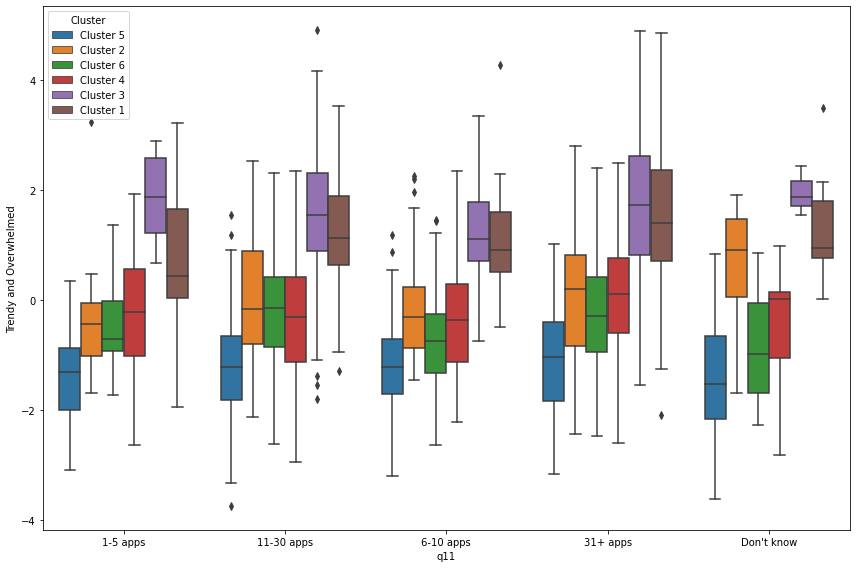

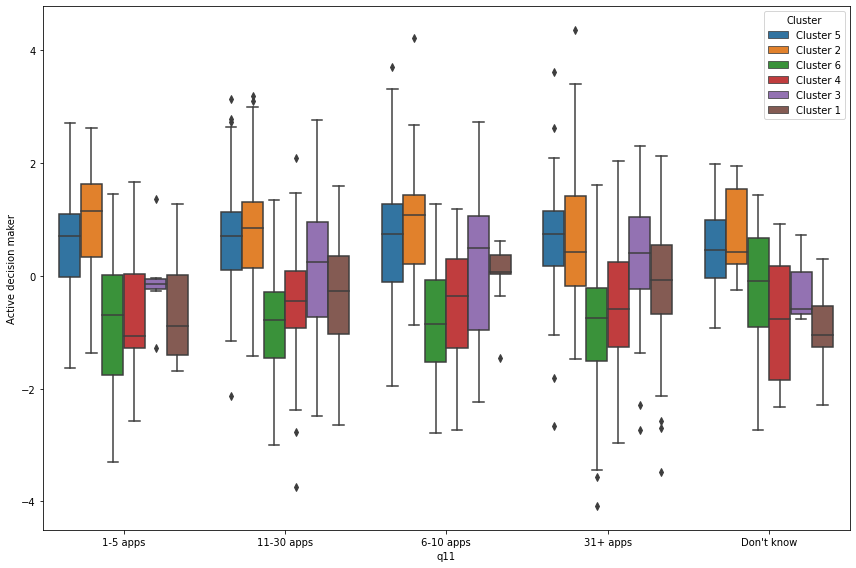

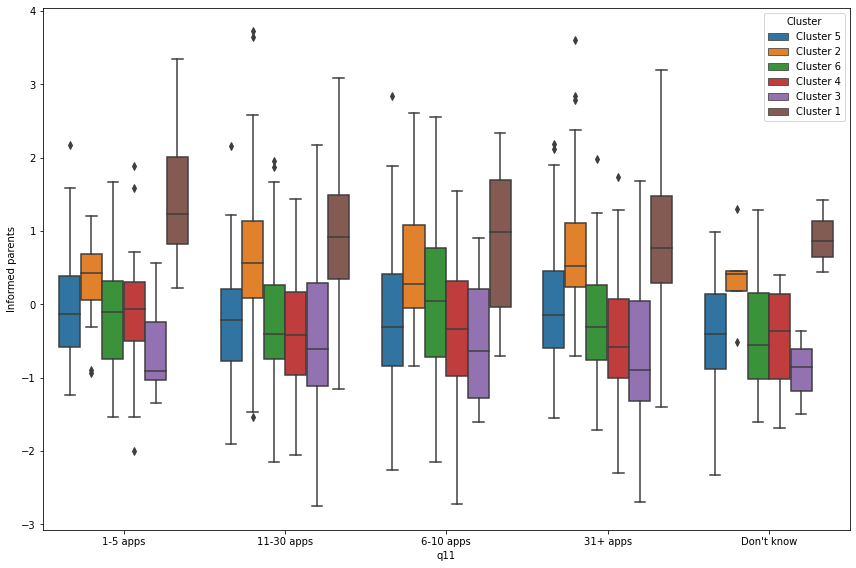

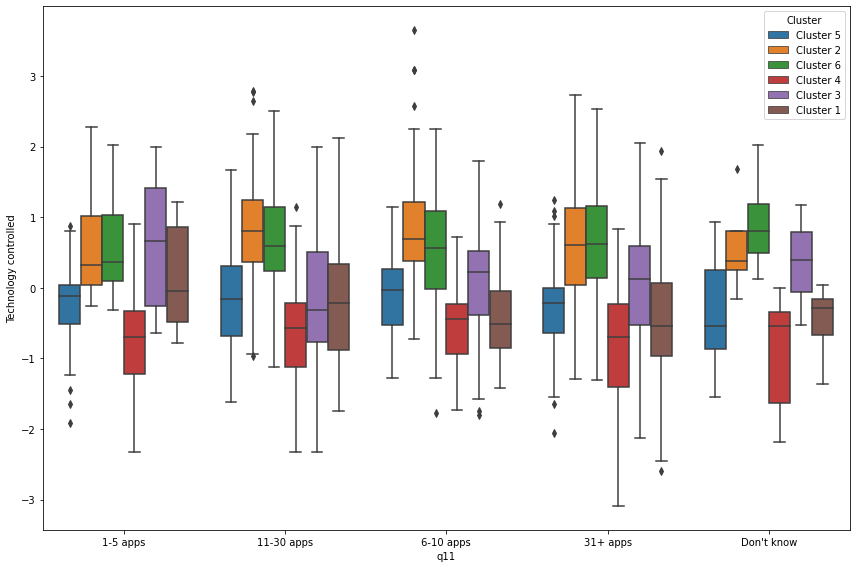

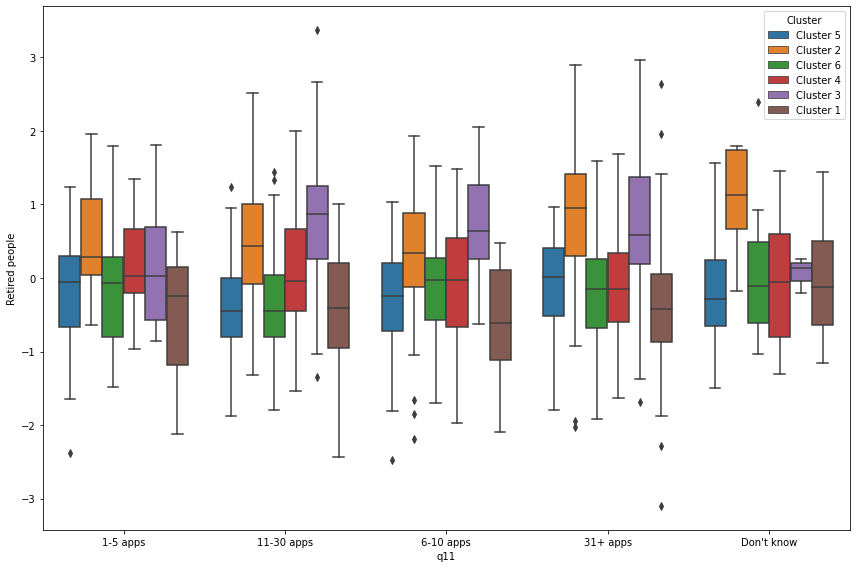

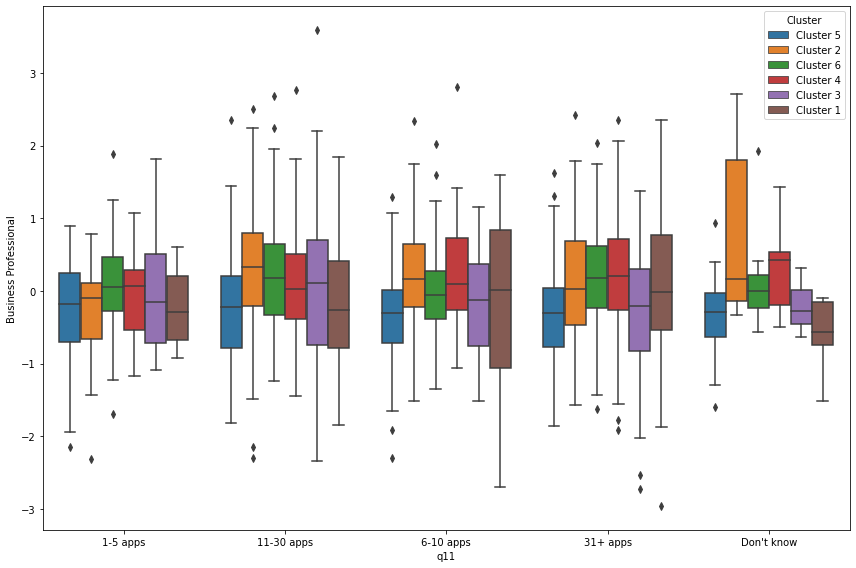

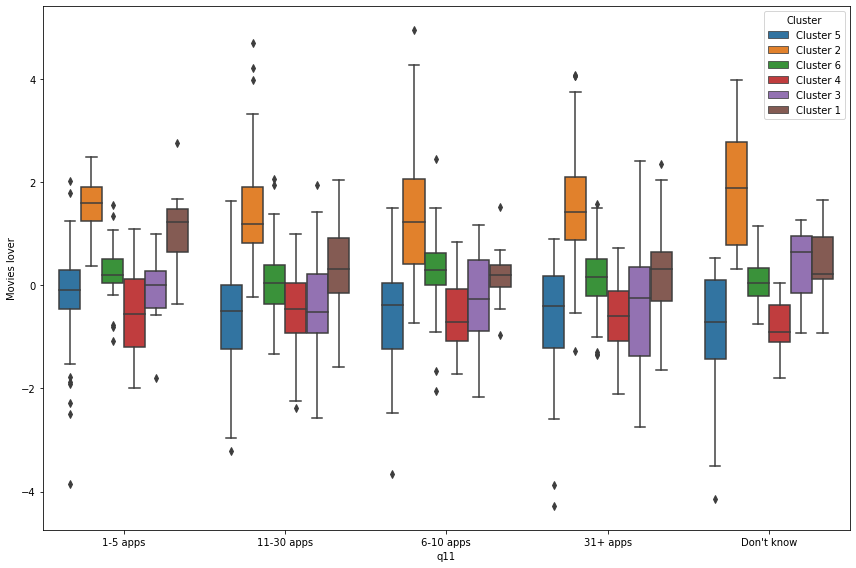

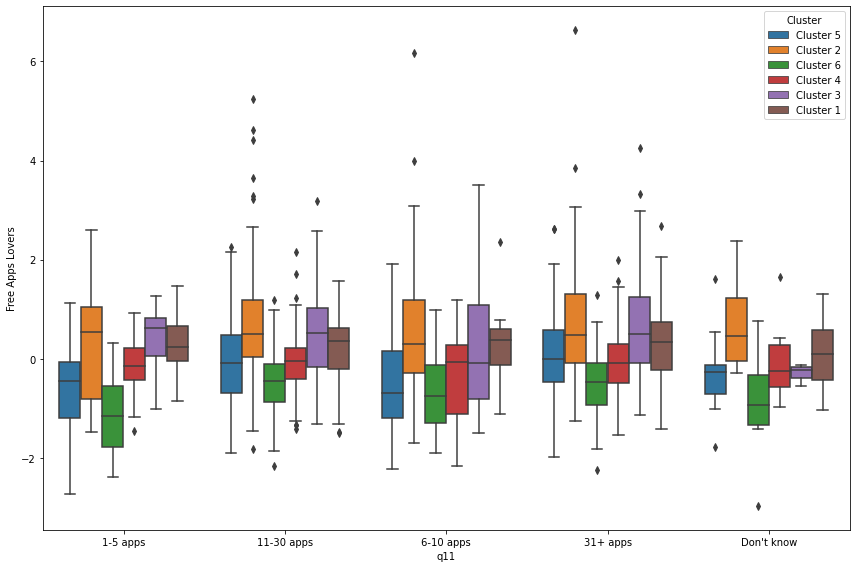

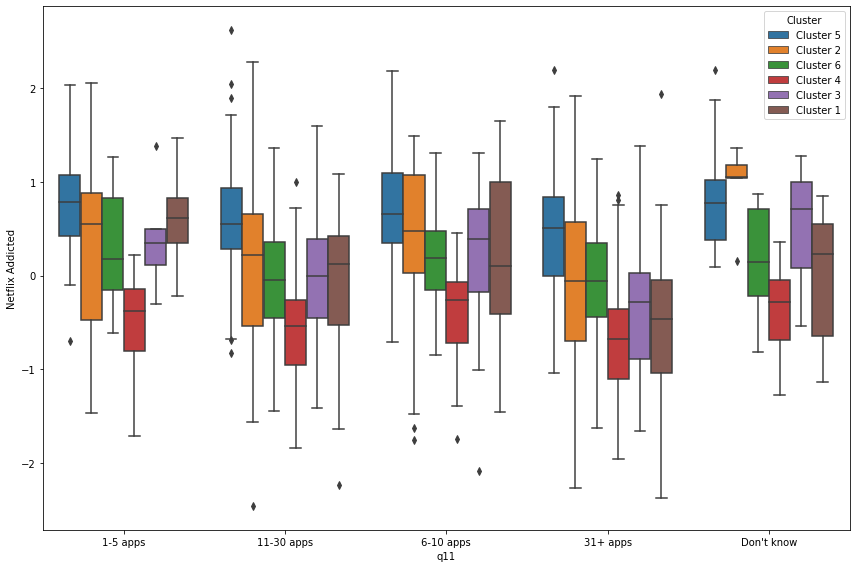

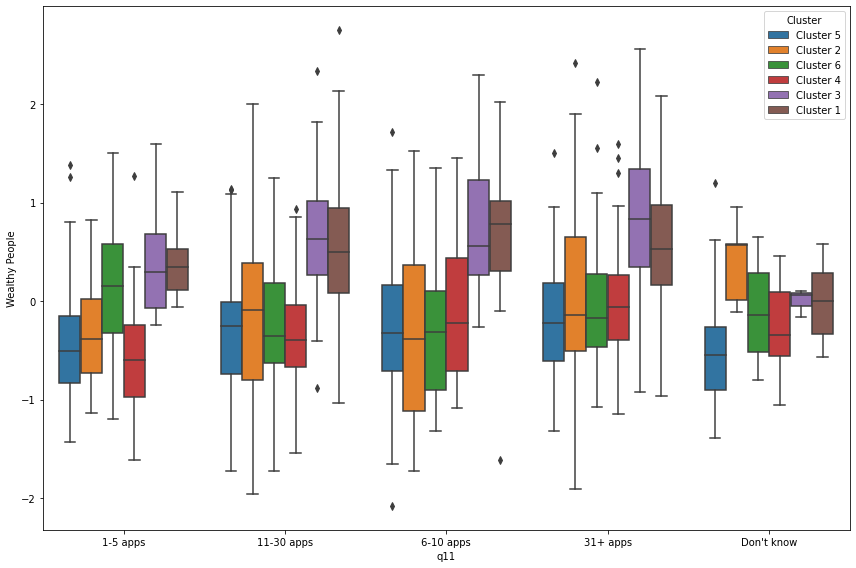

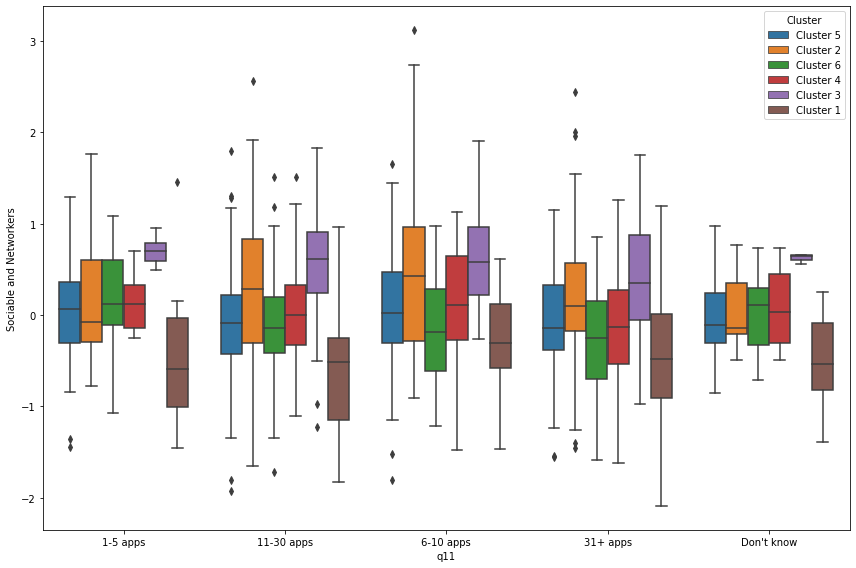

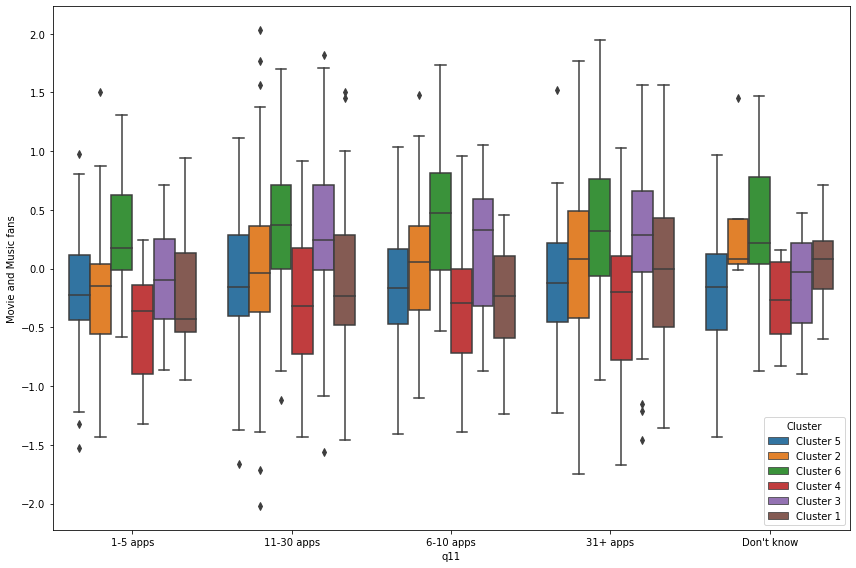

In [32]:
########################
# Number of apps
########################

# Carnivores
for comp in components:
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'q11',
                y = comp,
                hue = 'Cluster',
                data = data_df)
    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

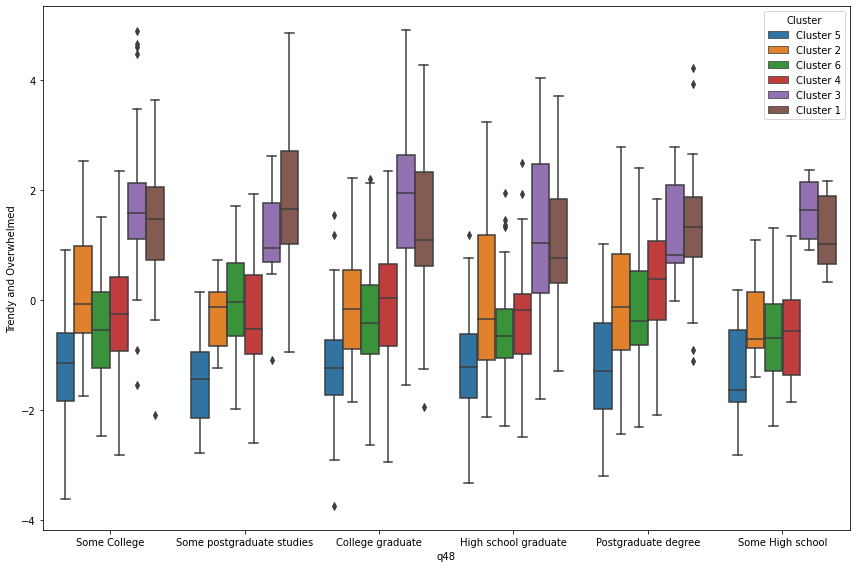

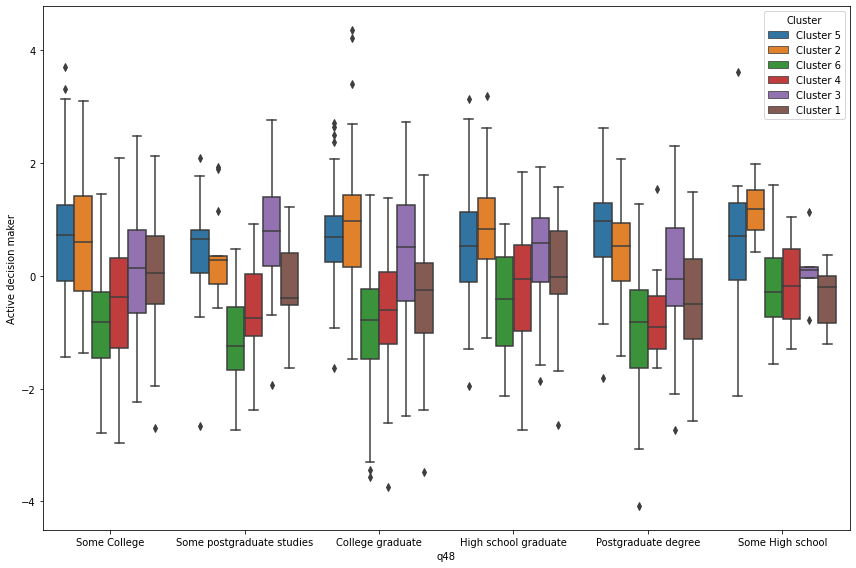

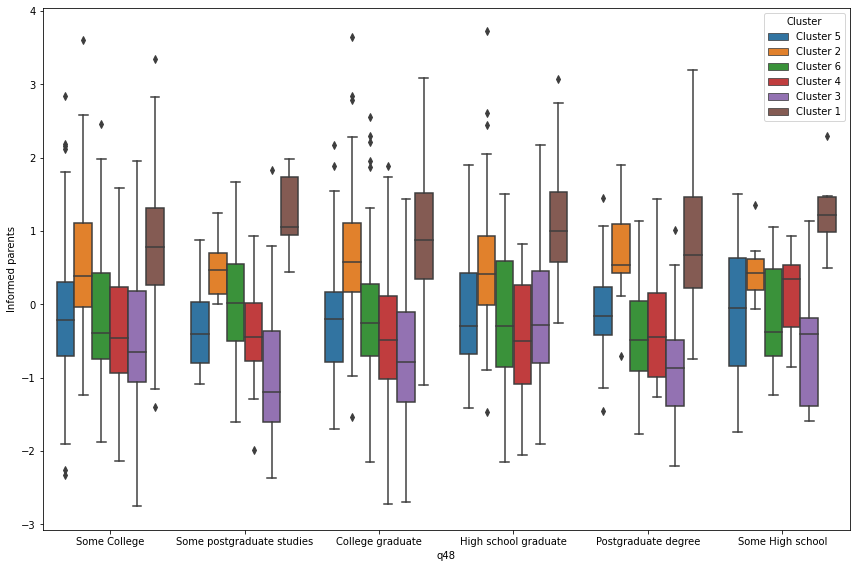

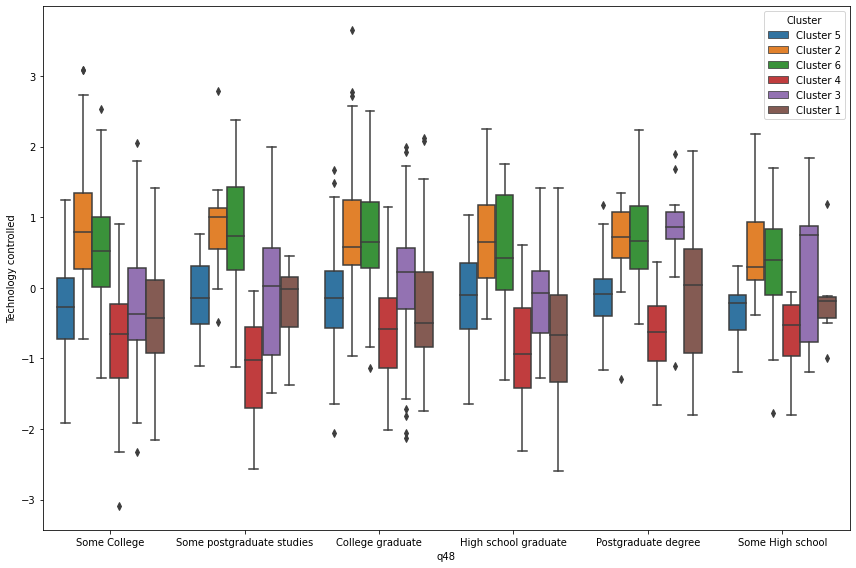

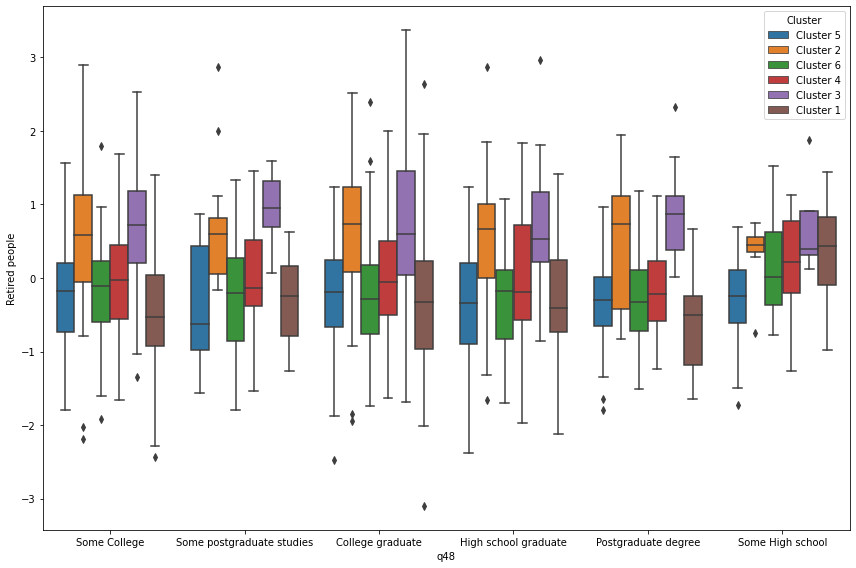

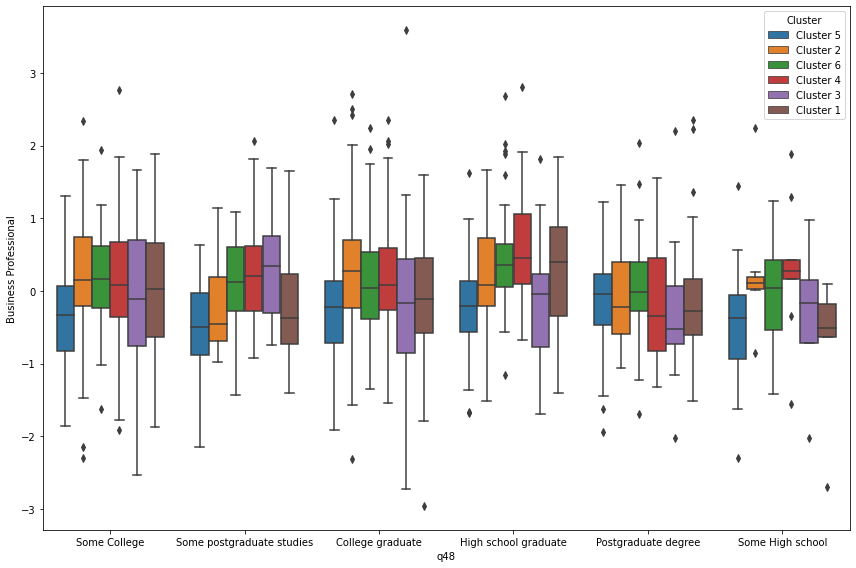

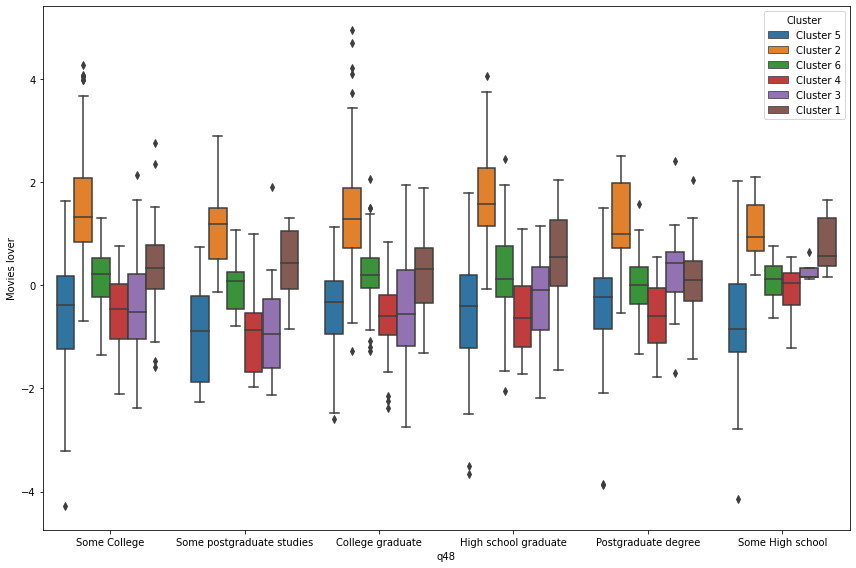

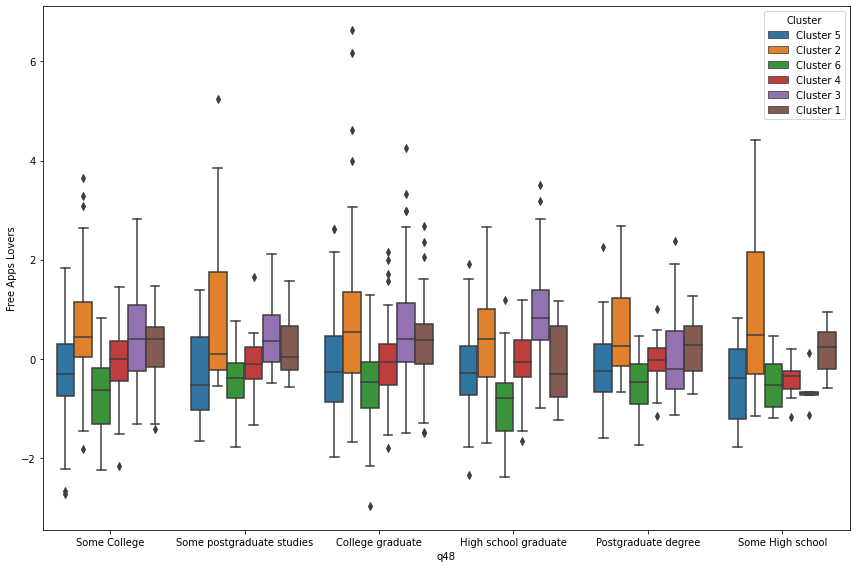

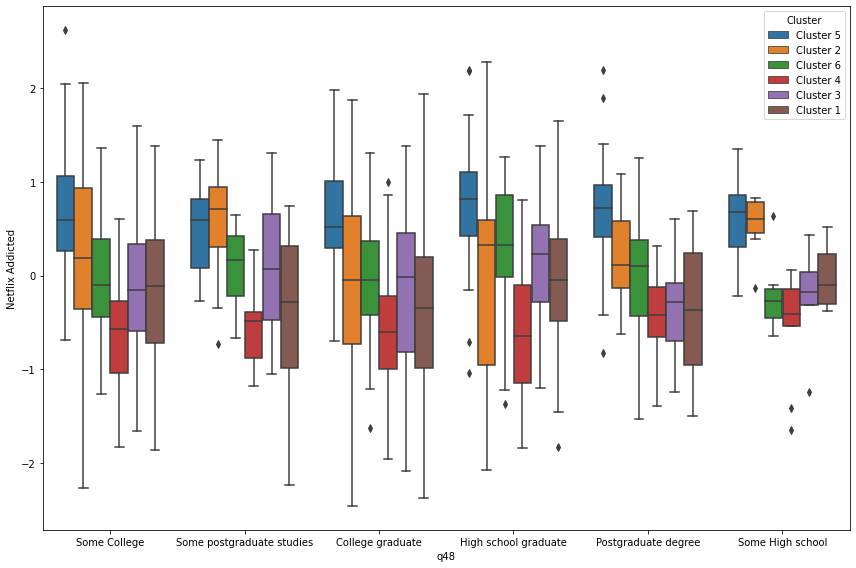

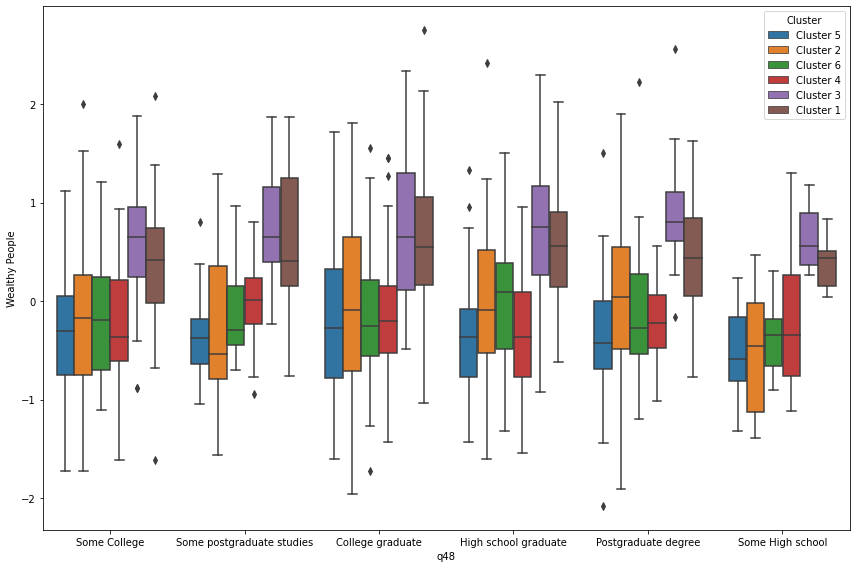

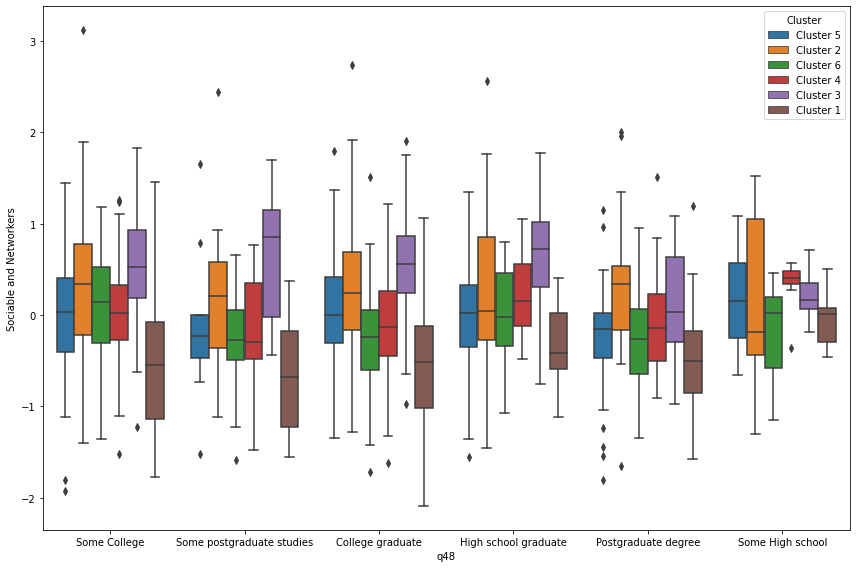

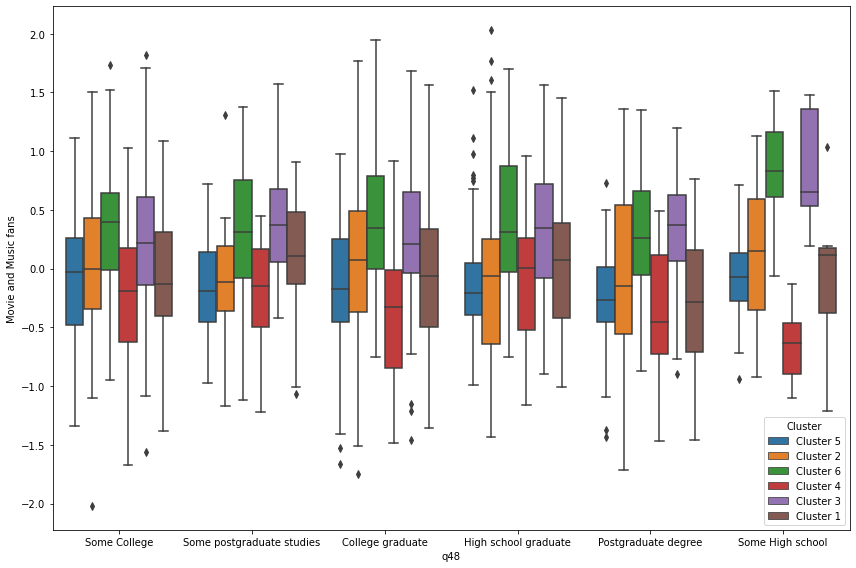

In [33]:
########################
# Education
########################


for comp in components:
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'q48',
                y = comp,
                hue = 'Cluster',
                data = data_df)
    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

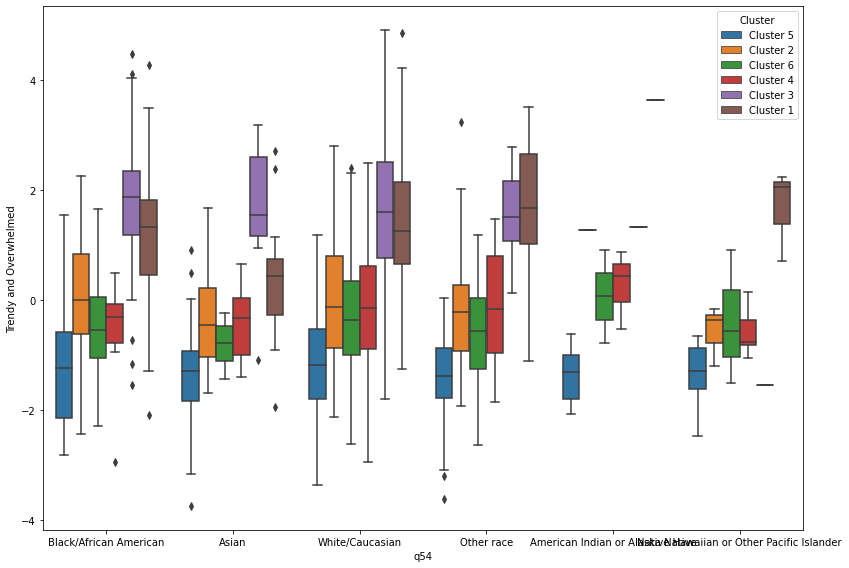

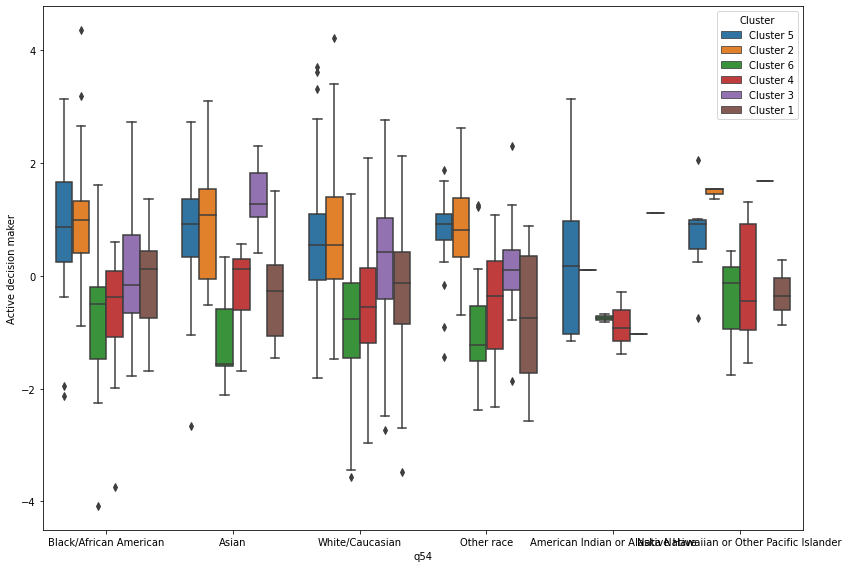

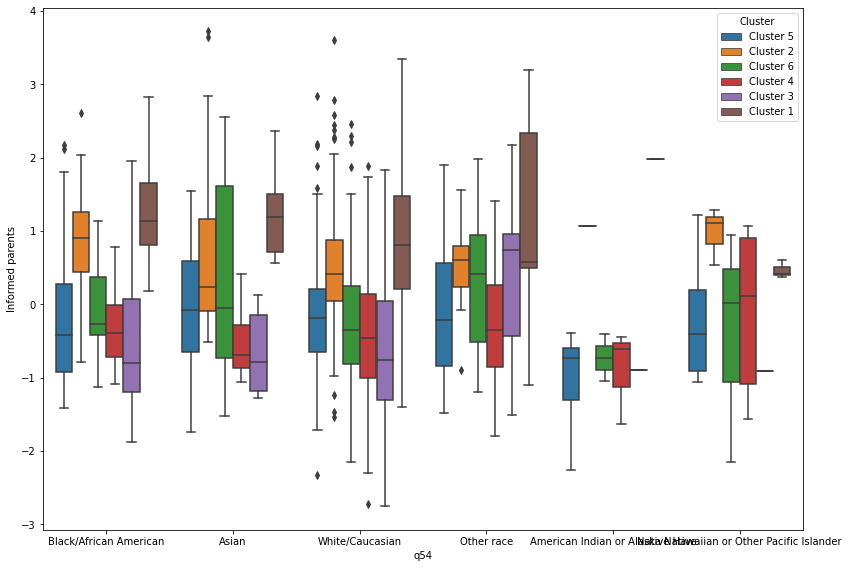

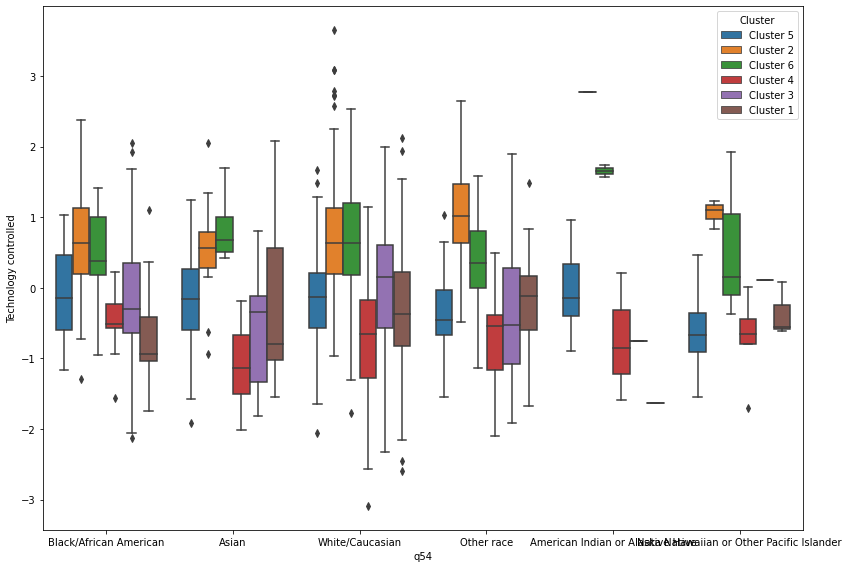

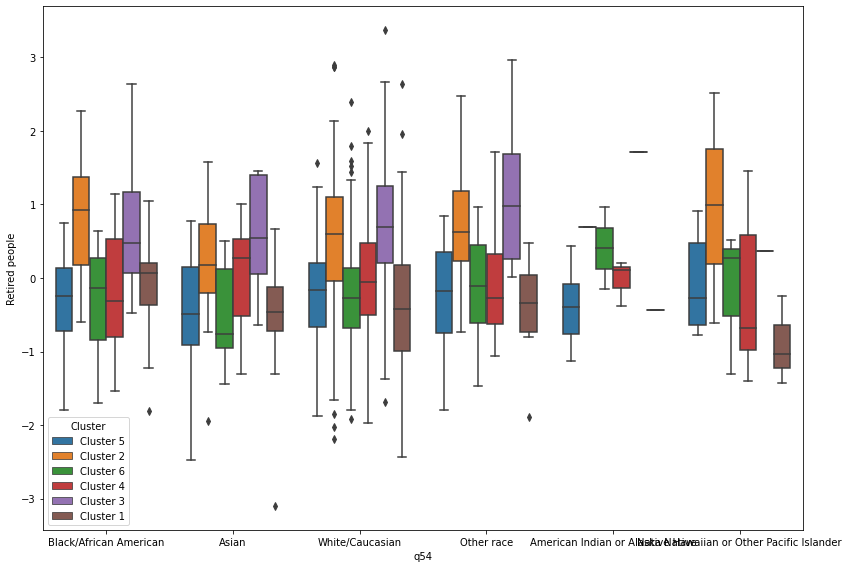

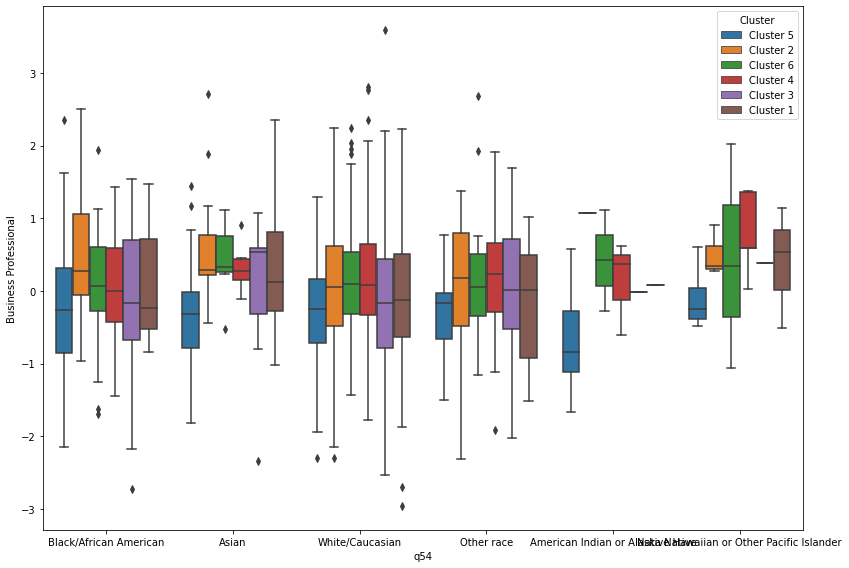

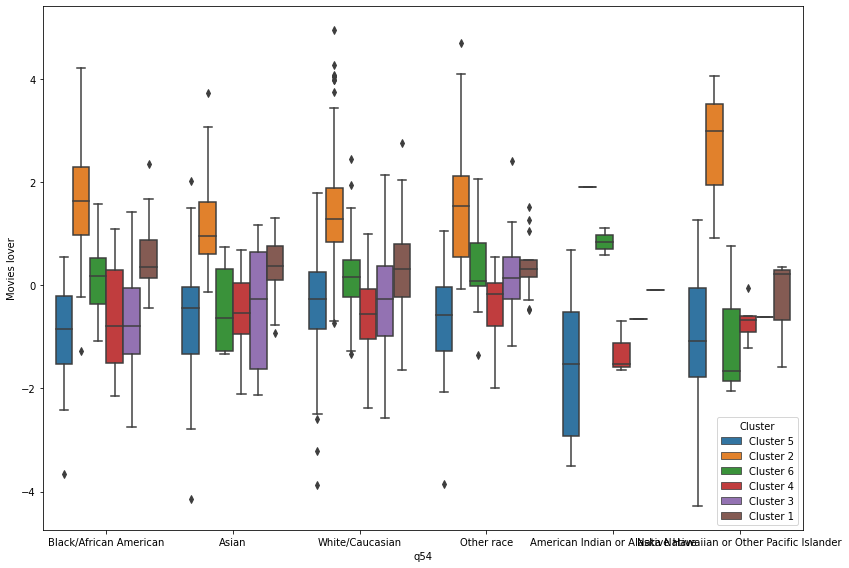

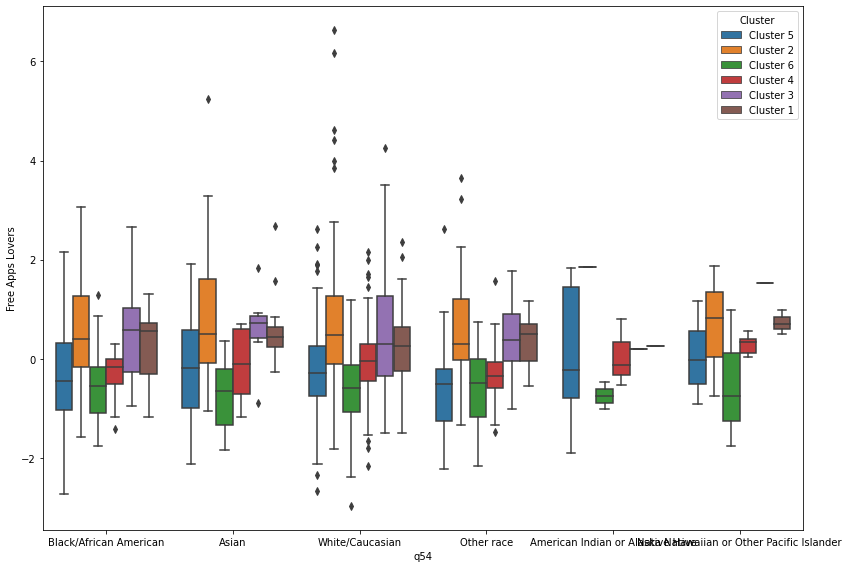

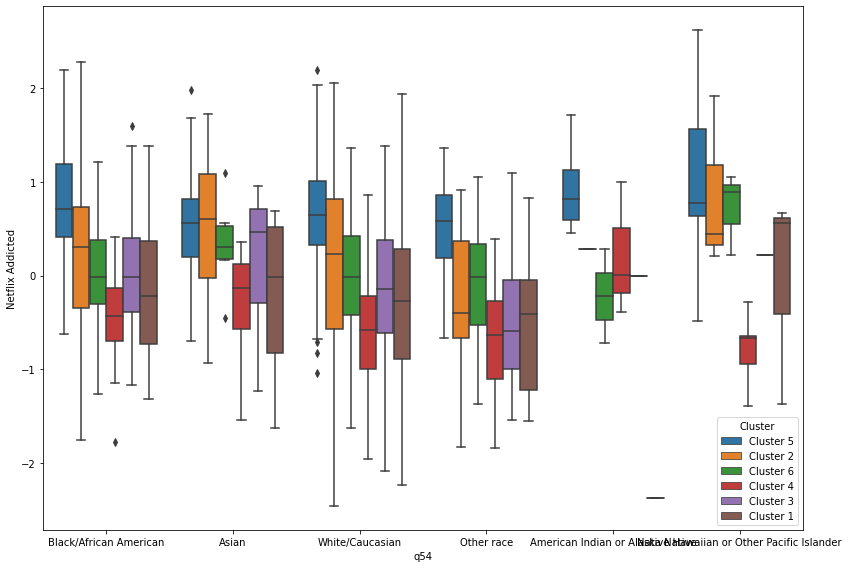

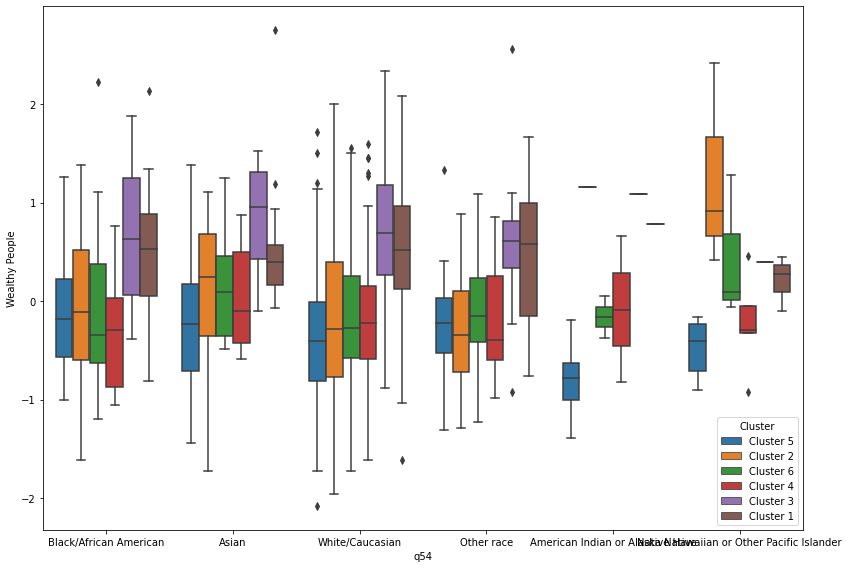

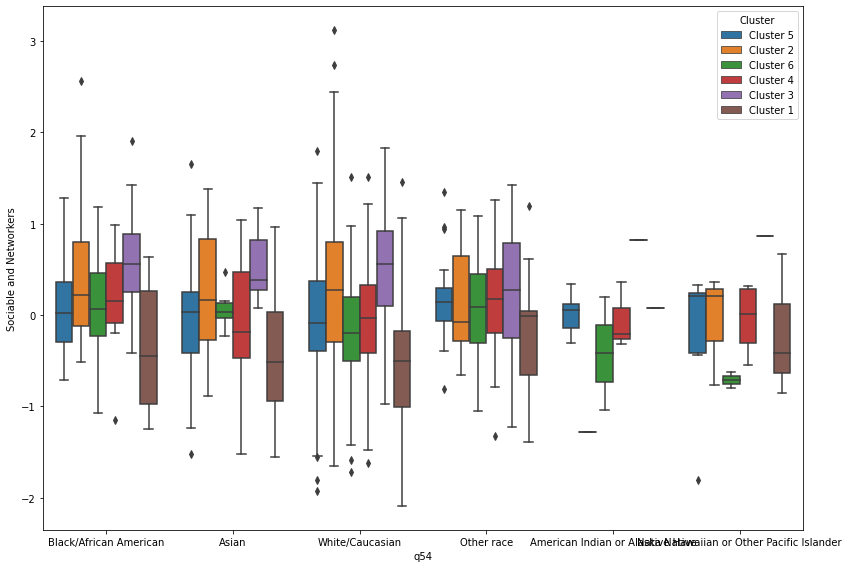

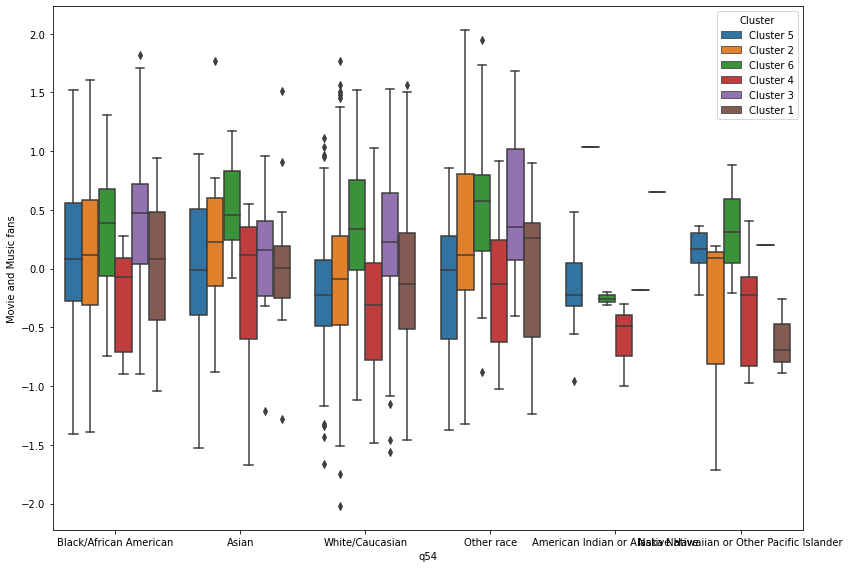

In [40]:
########################
# Race
########################

# Carnivores
for comp in components:
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'q54',
                y = comp,
                hue = 'Cluster',
                data = data_df)
    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

# Key Findings and Conclusions

# References

References: 

Garbade, D. M. (2018, September 12). Understanding K-means Clustering in Machine Learning. Retrieved from https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning.

Principal component analysis: A review and recent developments. Retrieved from https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202

https://www.statista.com/statistics/218984/number-of-global-mobile-users-since-2010/
